In [1]:
from settings import worlds, rsa_models
import numpy as np

verbose = False
RSA = 'classic_RSA'
version = 'RSA'
world = 'rate_distortion'
alpha = 0.1
depth = 15

# Initialize the RSA model with verbose mode
rsa_model = rsa_models[RSA]
#world = worlds[world]
world = {
    'file_name': 'rate_distortion.txt',
    'surname': 'Showing difference between RSA and RSA-RD',
    'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
    'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
    'lexicon': np.array([[0.7, 0.2, 0.025, 0.025, 0.05],[0.4, 0.5, 0.025, 0.025, 0.05],[0.025, 0.2, 0.45, 0.3, 0.025],[0.025, 0.025, 0.3, 0.5, 0.15],[0.15, 0.025, 0.025, 0.1, 0.7]]),
    'costs': np.array([0, 0, 0, 0, 0]),
    'priors': np.array([1/5,1/5,1/5,1/5,1/5])
}
rsa = rsa_model(world, save_directory='papers_experiments/',version=version, alpha=alpha, depth=depth)
# Run the RSA model
world, listeners, speakers = rsa.run(verbose)

In [2]:
from tabulate import tabulate
from IPython.display import display, Markdown, Latex
import numpy as np

title = f"Literal Speaker"
table = tabulate(np.round(speakers[0],3), headers=world["meanings"], showindex=world["utterances"], tablefmt="pipe")
display(Markdown("**"+title+"**"))
display(Markdown(table))
print("\n")

title = f"Literal Listener"
table = tabulate(np.round(listeners[0],3), headers=world["meanings"], showindex=world["utterances"], tablefmt="pipe")
display(Markdown("**"+title+"**"))
display(Markdown(table))
print("\n")

for i in range(1,len(speakers)-1):
    title = f"Pragmatic Speaker {i}"
    table = tabulate(np.round(speakers[i],3), headers=world["meanings"], showindex=world["utterances"], tablefmt="pipe")
    display(Markdown("**"+title+"**"))
    display(Markdown(table))
    print("\n")

    title = f"Pragmatic listener {i}"
    table = tabulate(np.round(listeners[i],3), headers=world["meanings"], showindex=world["utterances"], tablefmt="pipe")
    display(Markdown("**"+title+"**"))
    display(Markdown(table))
    print("\n")

title = f"Pragmatic Speaker {i+1}"
table = tabulate(np.round(speakers[i+1],3), headers=world["meanings"], showindex=world["utterances"], tablefmt="pipe")
display(Markdown("**"+title+"**"))
display(Markdown(table))
print("\n")

**Literal Speaker**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.538 |    0.211 |      0.03  |      0.026 |   0.051 |
| I like you              |   0.308 |    0.526 |      0.03  |      0.026 |   0.051 |
| You make me indifferent |   0.019 |    0.211 |      0.545 |      0.316 |   0.026 |
| I dislike you           |   0.019 |    0.026 |      0.364 |      0.526 |   0.154 |
| I hate you              |   0.115 |    0.026 |      0.03  |      0.105 |   0.718 |

**Literal Listener**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.7   |    0.2   |      0.025 |      0.025 |   0.05  |
| I like you              |   0.4   |    0.5   |      0.025 |      0.025 |   0.05  |
| You make me indifferent |   0.025 |    0.2   |      0.45  |      0.3   |   0.025 |
| I dislike you           |   0.025 |    0.025 |      0.3   |      0.5   |   0.15  |
| I hate you              |   0.15  |    0.025 |      0.025 |      0.1   |   0.7   |

**Pragmatic Speaker 1**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.236 |    0.212 |      0.178 |      0.173 |   0.187 |
| I like you              |   0.223 |    0.232 |      0.178 |      0.173 |   0.187 |
| You make me indifferent |   0.169 |    0.212 |      0.238 |      0.222 |   0.174 |
| I dislike you           |   0.169 |    0.172 |      0.228 |      0.233 |   0.209 |
| I hate you              |   0.202 |    0.172 |      0.178 |      0.199 |   0.243 |

**Pragmatic listener 1**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.239 |    0.215 |      0.181 |      0.175 |   0.19  |
| I like you              |   0.225 |    0.234 |      0.179 |      0.174 |   0.188 |
| You make me indifferent |   0.167 |    0.209 |      0.234 |      0.219 |   0.172 |
| I dislike you           |   0.167 |    0.17  |      0.226 |      0.231 |   0.206 |
| I hate you              |   0.203 |    0.173 |      0.179 |      0.2   |   0.245 |

**Pragmatic Speaker 2**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.204 |    0.202 |      0.198 |      0.198 |   0.199 |
| I like you              |   0.203 |    0.203 |      0.198 |      0.197 |   0.199 |
| You make me indifferent |   0.197 |    0.201 |      0.203 |      0.202 |   0.197 |
| I dislike you           |   0.197 |    0.197 |      0.203 |      0.203 |   0.201 |
| I hate you              |   0.201 |    0.197 |      0.198 |      0.2   |   0.204 |

**Pragmatic listener 2**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |   0.204 |    0.202 |      0.198 |      0.198 |   0.199 |
| I like you              |   0.203 |    0.203 |      0.198 |      0.197 |   0.199 |
| You make me indifferent |   0.197 |    0.201 |      0.203 |      0.202 |   0.197 |
| I dislike you           |   0.197 |    0.197 |      0.203 |      0.203 |   0.201 |
| I hate you              |   0.201 |    0.197 |      0.198 |      0.2   |   0.204 |

**Pragmatic Speaker 3**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 3**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 4**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 4**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 5**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 5**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 6**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 6**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 7**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 7**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 8**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 8**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 9**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 9**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 10**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 10**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 11**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 11**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 12**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 12**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 13**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 13**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 14**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic listener 14**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

**Pragmatic Speaker 15**

|                         |   Lover |   Friend |   Somebody |   Unfriend |   Hater |
|:------------------------|--------:|---------:|-----------:|-----------:|--------:|
| I love you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I like you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| You make me indifferent |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I dislike you           |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |
| I hate you              |     0.2 |      0.2 |        0.2 |        0.2 |     0.2 |

In [3]:
from utils import compute_shannon_conditional_entropy, compute_listener_value
entropies = [compute_shannon_conditional_entropy(world["priors"],speakers[1 + i//2]) for i in range((len(speakers)-1)*2)]
values = [compute_listener_value(alpha, world["priors"], listeners[(i+1)//2], speakers[1 + i//2]) for i in range((len(speakers)-1)*2)]
gains = [values[i]+entropies[i] for i in range((len(speakers)-1)*2)]

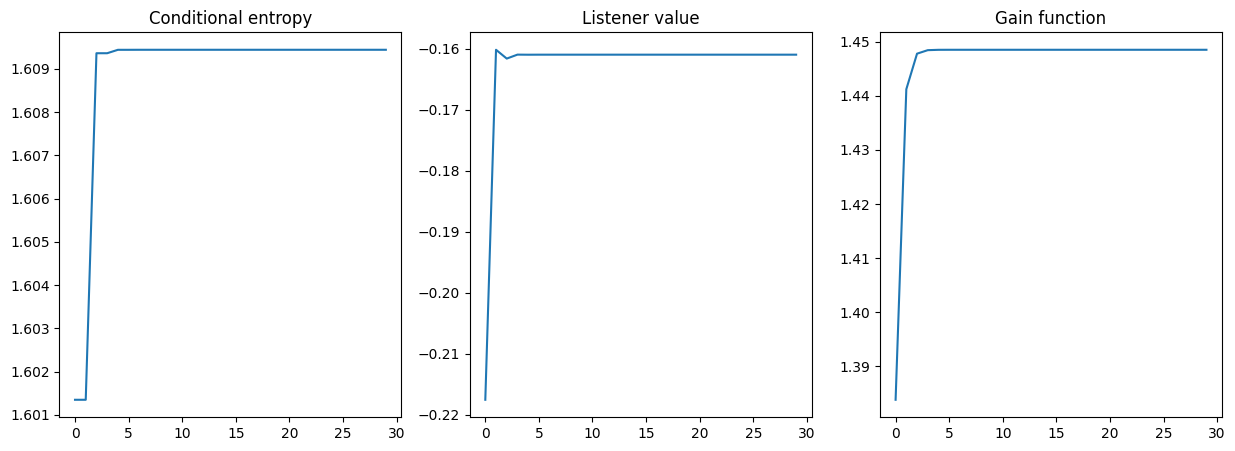

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(entropies)
axs[0].set_title("Conditional entropy")

axs[1].plot(values)
axs[1].set_title("Listener value")

axs[2].plot(gains)
axs[2].set_title("Gain function")

plt.show()

## Analysis of asymptotic behavior for a fixed lexicon but different $\alpha$ parameters

### Without structural zeros

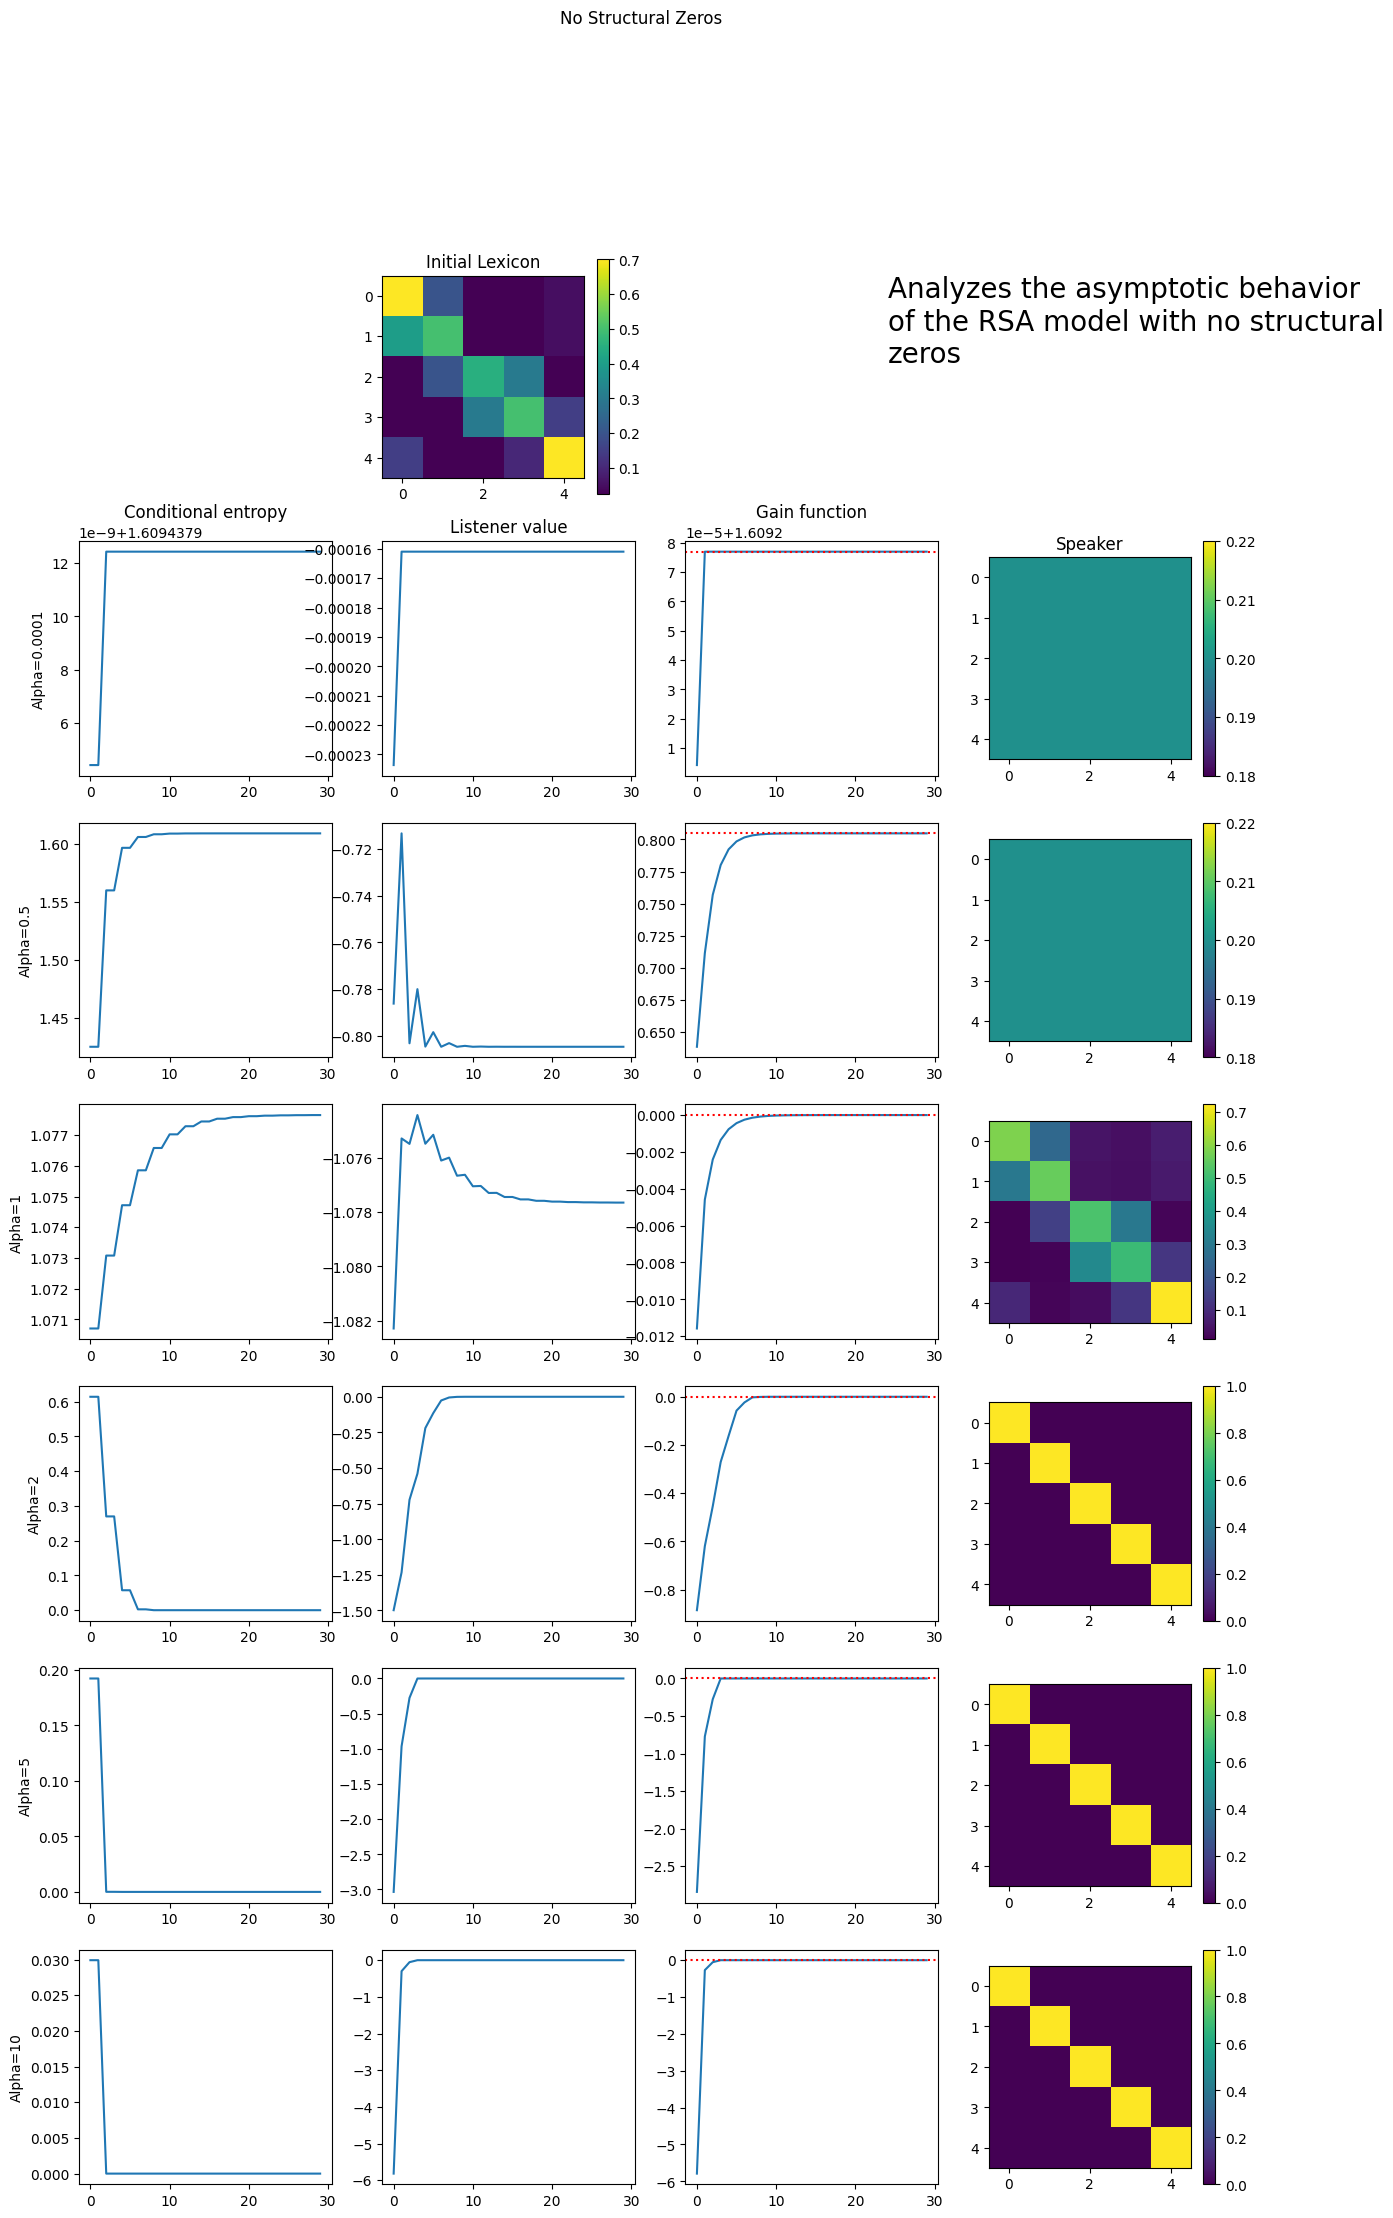

In [5]:
from analyses import asymptotic_analysis_alphas
from settings import worlds, rsa_models
import numpy as np

alphas_list = [0.0001, 0.5, 1, 2, 5, 10]
rsa_model = rsa_models['classic_RSA']
world = {
    'file_name': 'Asymptotic_behavior_no_structural_zeros.txt',
    'surname': 'Analyzes the asymptotic behavior of the RSA model with no structural zeros',
    'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
    'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
    'lexicon': np.array([[0.7, 0.2, 0.025, 0.025, 0.05],[0.4, 0.5, 0.025, 0.025, 0.05],[0.025, 0.2, 0.45, 0.3, 0.025],[0.025, 0.025, 0.3, 0.5, 0.15],[0.15, 0.025, 0.025, 0.1, 0.7]]),
    'costs': np.array([0, 0, 0, 0, 0]),
    'priors': np.array([1/5,1/5,1/5,1/5,1/5])
}
version = 'RSA'
depth = 15
verbose = False

asymptotic_analysis_alphas(alphas_list, rsa_model, world, version, depth, verbose)

We observe what the paper about RD-RSA says: for $\alpha < 1$, the convergence to a uniform distribution always occurs; for $\alpha > 1$, the distribution converges to a dirac law; $\alpha = 1$ is a critical point for which we observe a smoother limit.\\
Moreover, the gains theoretically obtained by the RD-RSA are confirmed by the simulations.

### With structural zeros

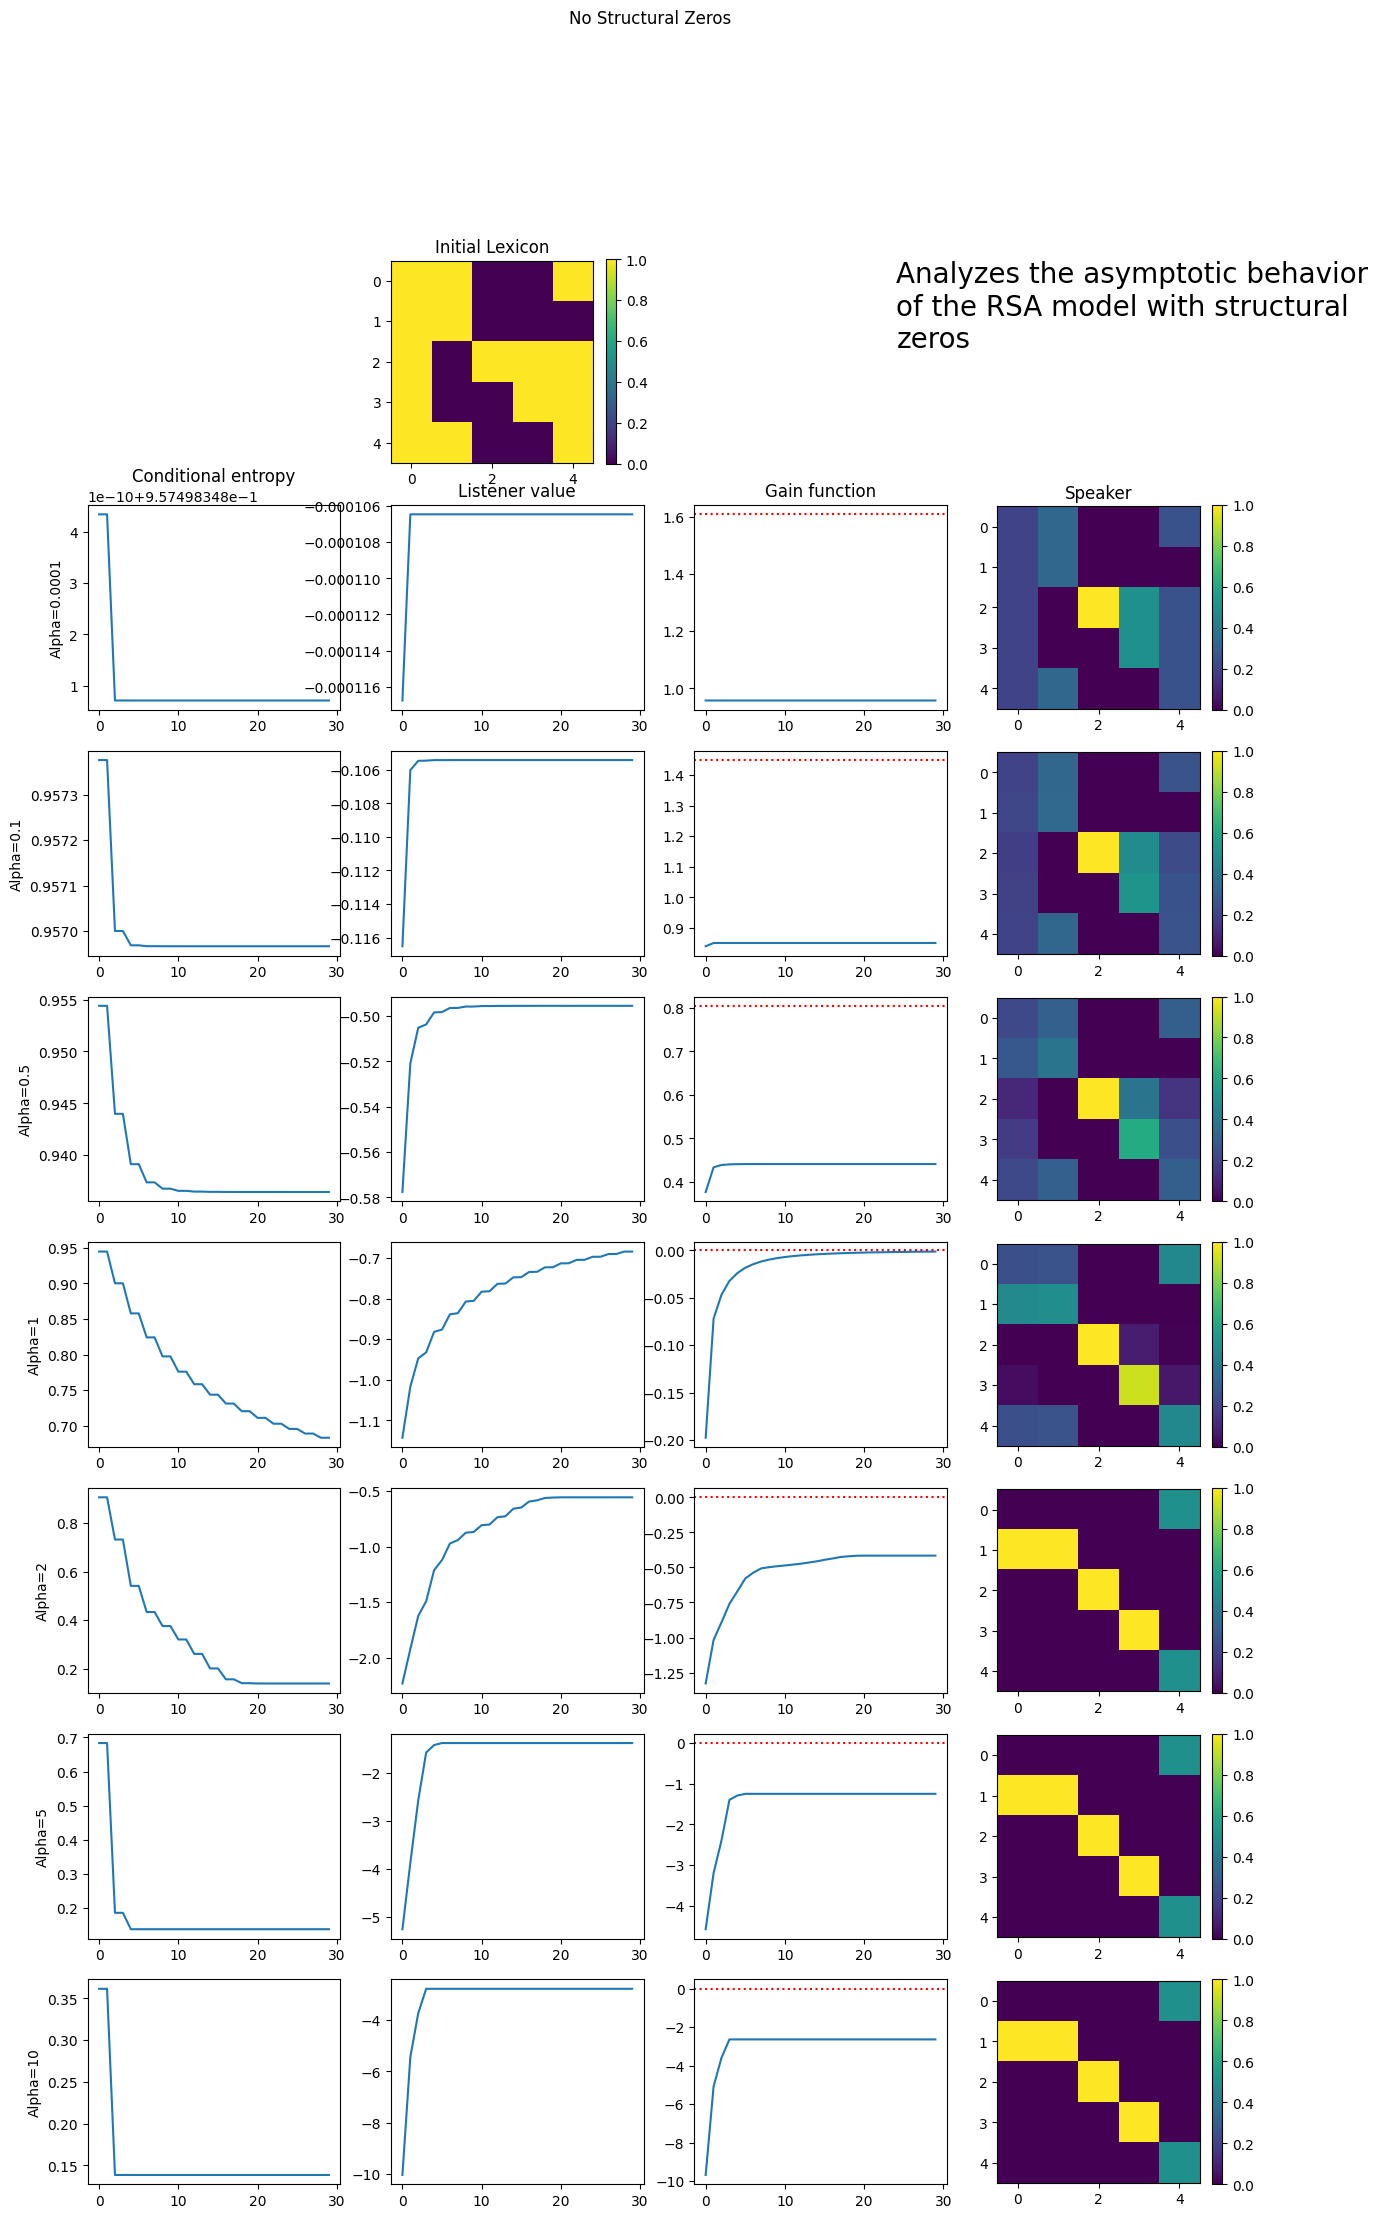

In [6]:
from analyses import asymptotic_analysis_alphas
from settings import worlds, rsa_models
import numpy as np

alphas_list = [0.0001, 0.1, 0.5, 1, 2, 5, 10]
rsa_model = rsa_models['classic_RSA']
world = {
    'file_name': 'Asymptotic_behavior_with_structural_zeros.txt',
    'surname': 'Analyzes the asymptotic behavior of the RSA model with structural zeros',
    'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
    'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
    'lexicon': np.array([[1, 1, 0, 0, 1],[1, 1, 0, 0, 0],[1, 0, 1, 1, 1],[1, 0, 0, 1, 1],[1, 1, 0, 0, 1]]),
    'costs': np.array([0, 0, 0, 0, 0]),
    'priors': np.array([1/5,1/5,1/5,1/5,1/5])
}
version = 'RSA'
depth = 15
verbose = False

asymptotic_analysis_alphas(alphas_list, rsa_model, world, version, depth, verbose)

The theroretical gains obtained for cases without structural zeros do not yield anymore. With a small $\alpha$ we tend to a uniform distribution for each conditional speaker (see next paragraph for more). With large $\alpha$ parameters, the distribution tends at lowering the entropy of the conditional speaker by trying to choose the best utterances for each word.

If the results for large $\alpha$ values seem more pragmatic, $\alpha=1$ case is, according to multiple papers, the one that mimics the best the human behavior. Thus, the entropy term is here to keep an uncertainty towards the choice of the utterance, to mimic the non-deterministic behavior of humans.

## Analysis of asymptotic convergence for a fixed alpha and different lexica

#### $\alpha=10e-4$

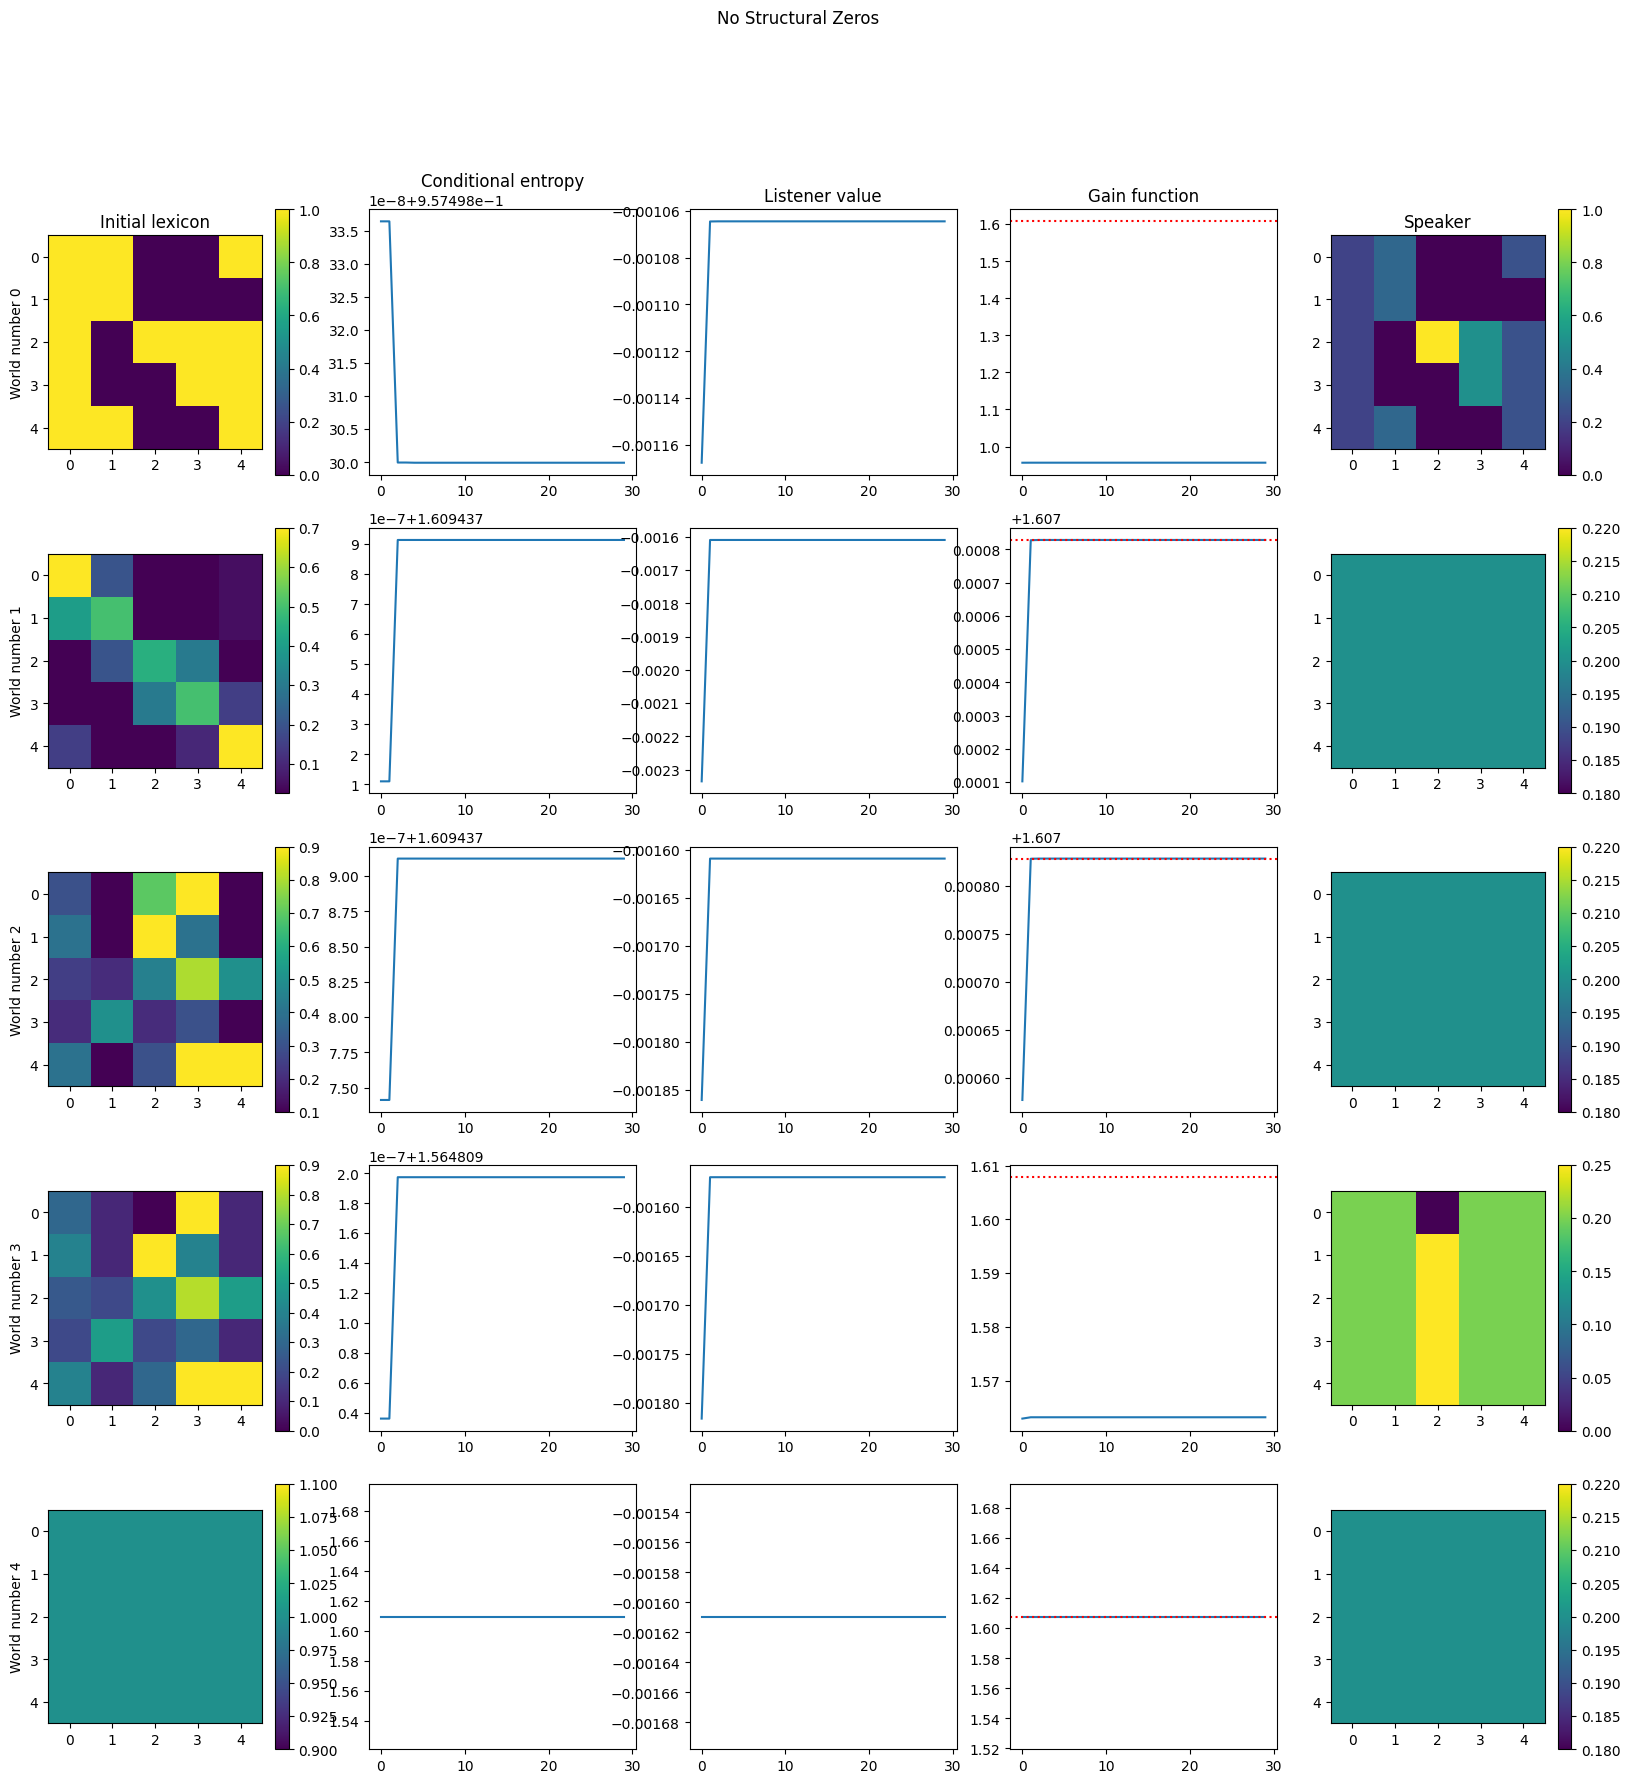

In [2]:
from analyses import asymptotic_analysis_lexica
from settings import worlds, rsa_models
import numpy as np

alpha = 10e-4
rsa_model = rsa_models['classic_RSA']
worlds = [
    {
        'file_name': 'Asymptotic_identicality_1.txt',
        'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
        'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
        'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
        'lexicon': np.array([[1, 1, 0, 0, 1],[1, 1, 0, 0, 0],[1, 0, 1, 1, 1],[1, 0, 0, 1, 1],[1, 1, 0, 0, 1]]),
        'costs': np.array([0, 0, 0, 0, 0]),
        'priors': np.array([1/5,1/5,1/5,1/5,1/5])
    },
    {
        'file_name': 'Asymptotic_identicality_2.txt',
        'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
        'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
        'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
        'lexicon': np.array([[0.7, 0.2, 0.025, 0.025, 0.05],[0.4, 0.5, 0.025, 0.025, 0.05],[0.025, 0.2, 0.45, 0.3, 0.025],[0.025, 0.025, 0.3, 0.5, 0.15],[0.15, 0.025, 0.025, 0.1, 0.7]]),
        'costs': np.array([0, 0, 0, 0, 0]),
        'priors': np.array([1/5,1/5,1/5,1/5,1/5])
    },
    {
        'file_name': 'Asymptotic_identicality_3.txt',
        'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
        'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
        'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
        'lexicon': np.array([[0.3, 0.1, 0.7, 0.9, 0.1],[0.4, 0.1, 0.9, 0.4, 0.1],[0.25, 0.2, 0.45, 0.8, 0.5],[0.2, 0.5, 0.2, 0.3, 0.1],[0.4, 0.1, 0.3, 0.9, 0.9]]),
        'costs': np.array([0, 0, 0, 0, 0]),
        'priors': np.array([1/5,1/5,1/5,1/5,1/5])
    },
    {
        'file_name': 'Asymptotic_identicality_3.txt',
        'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
        'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
        'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
        'lexicon': np.array([[0.3, 0.1, 0, 0.9, 0.1],[0.4, 0.1, 0.9, 0.4, 0.1],[0.25, 0.2, 0.45, 0.8, 0.5],[0.2, 0.5, 0.2, 0.3, 0.1],[0.4, 0.1, 0.3, 0.9, 0.9]]),
        'costs': np.array([0, 0, 0, 0, 0]),
        'priors': np.array([1/5,1/5,1/5,1/5,1/5])
    },
    {
        'file_name': 'Asymptotic_identicality_4.txt',
        'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
        'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
        'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
        'lexicon': np.array([[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1]]),
        'costs': np.array([0, 0, 0, 0, 0]),
        'priors': np.array([1/5,1/5,1/5,1/5,1/5])
    },
]
version = 'RSA'
depth = 15
verbose = False

asymptotic_analysis_lexica(alpha, rsa_model, worlds, version, depth, verbose)

With a small enough $\alpha$, the RSA speaker converges to uniform distributions for $S(u|m)$ while keeping the structural zeros.  

Let's observe what happens for a few randomly chosen lexica (without structural zeros), for a sequence of $\alpha$.

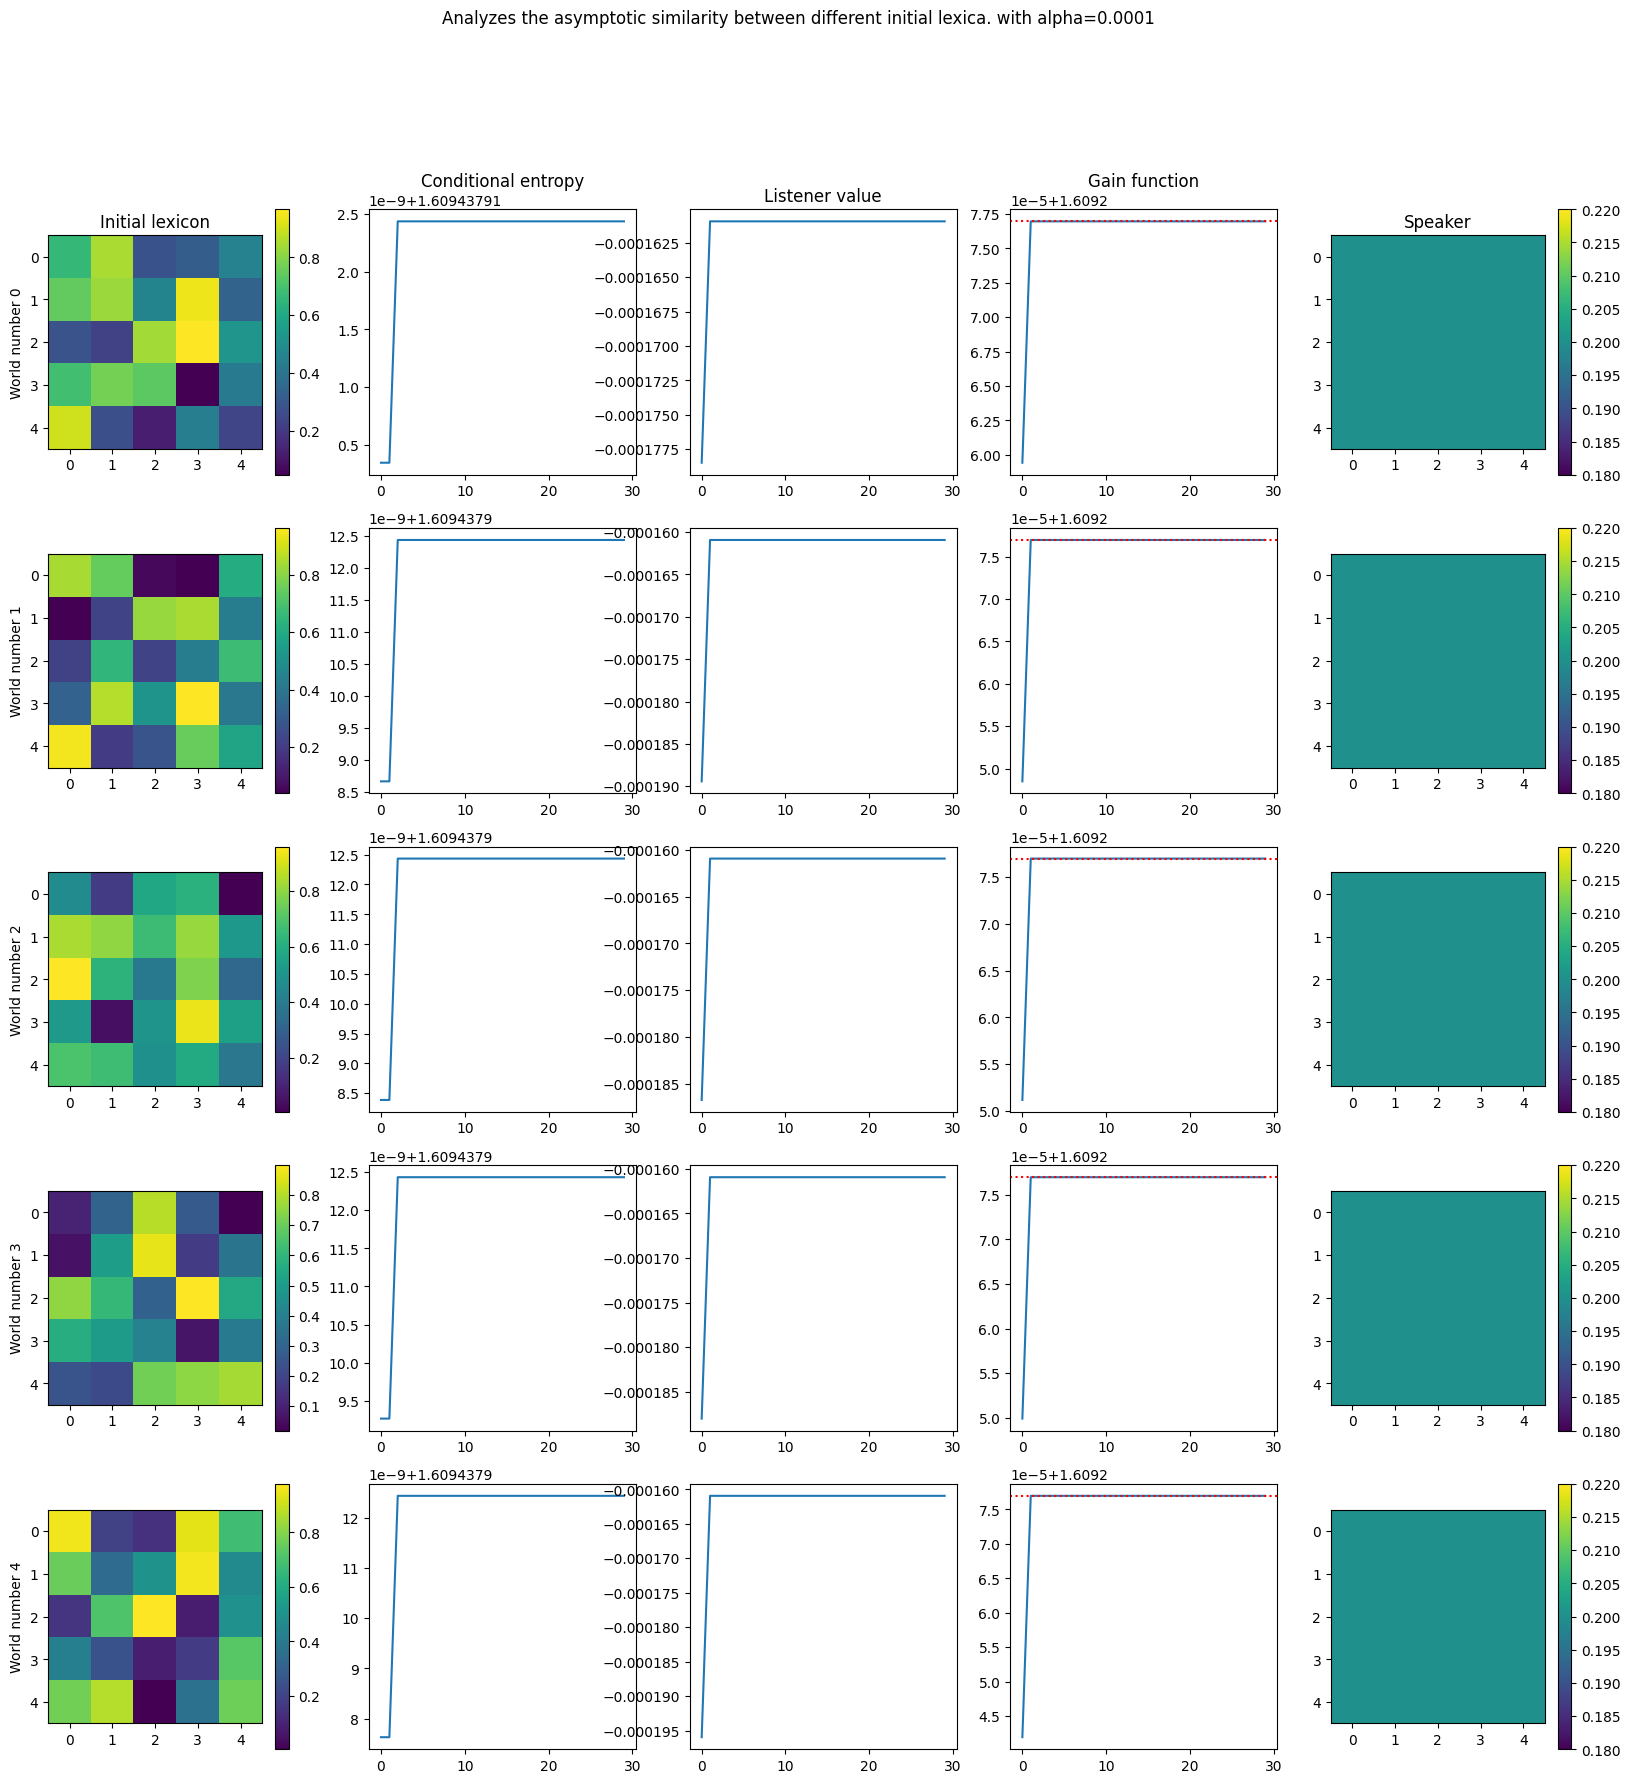

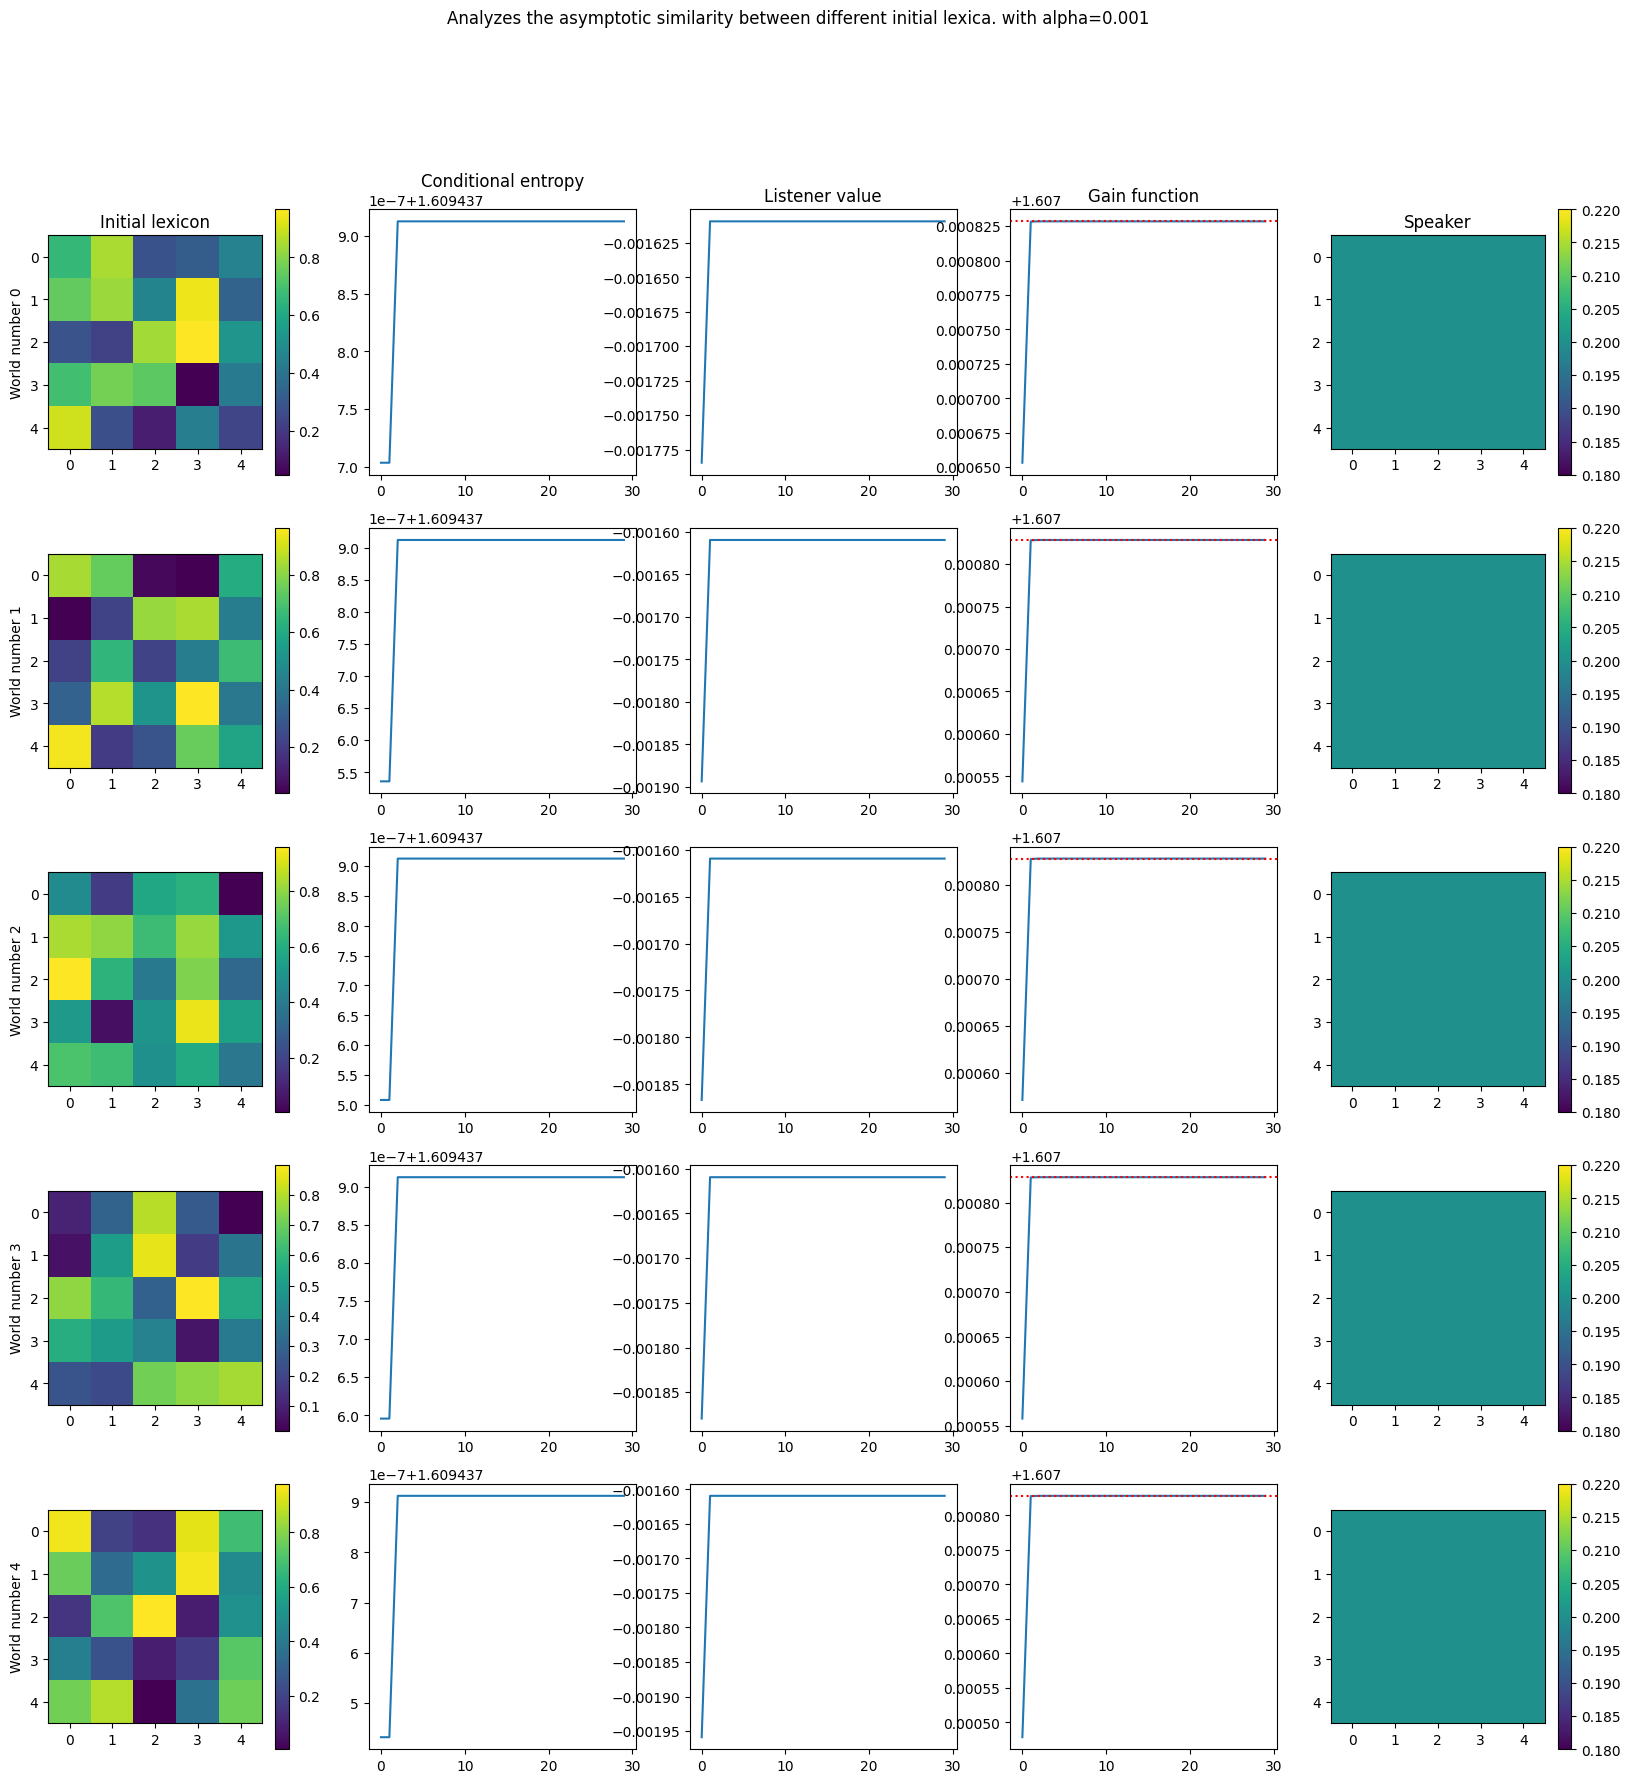

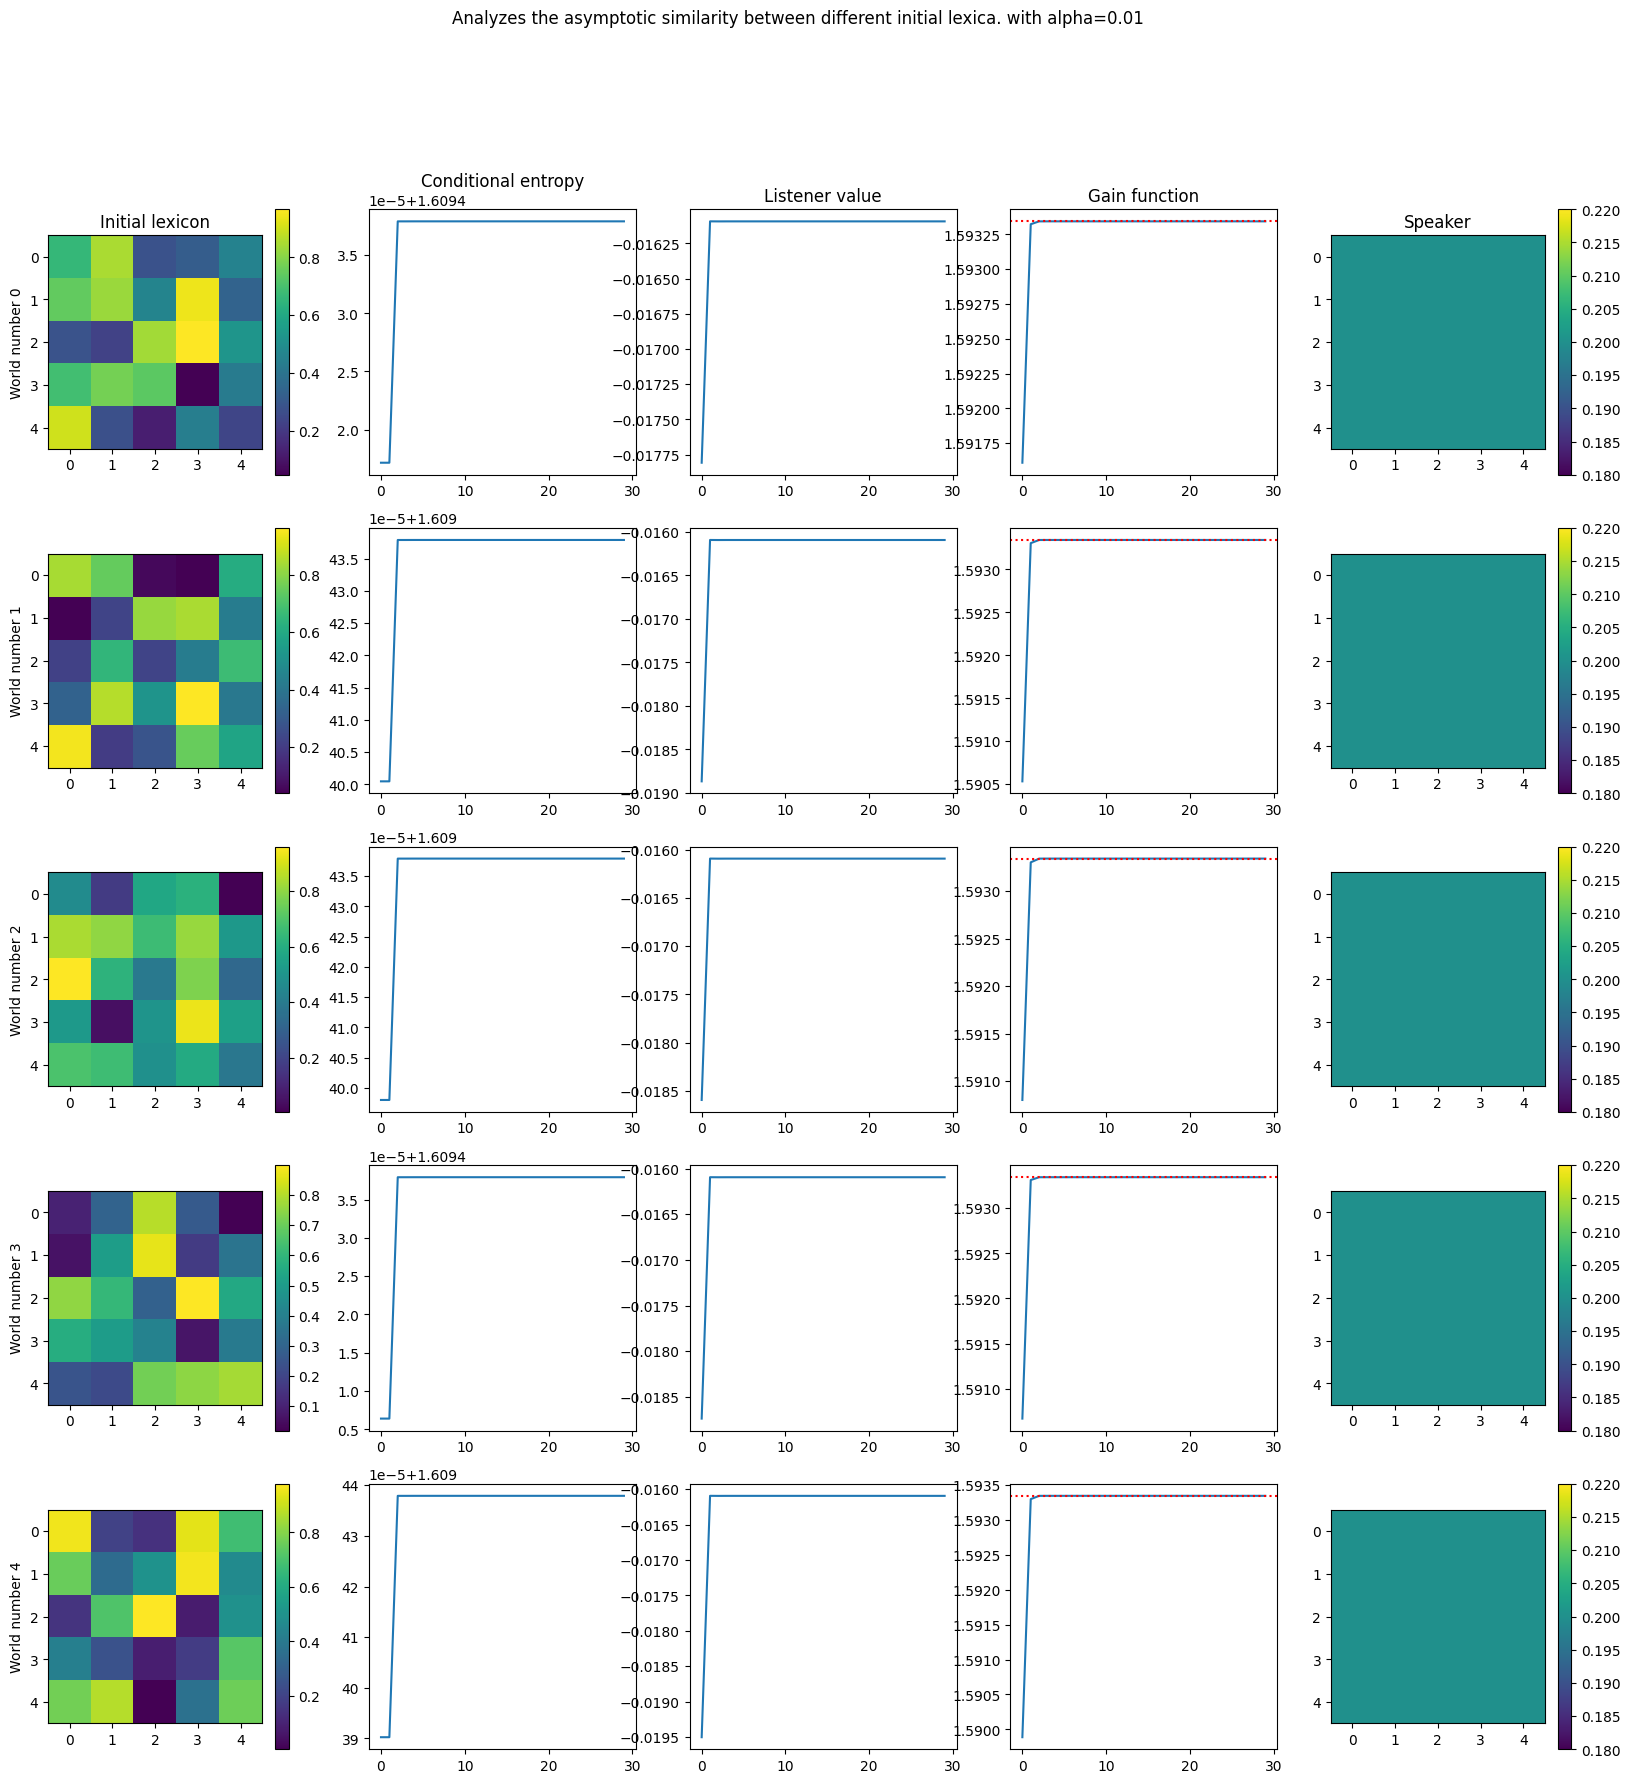

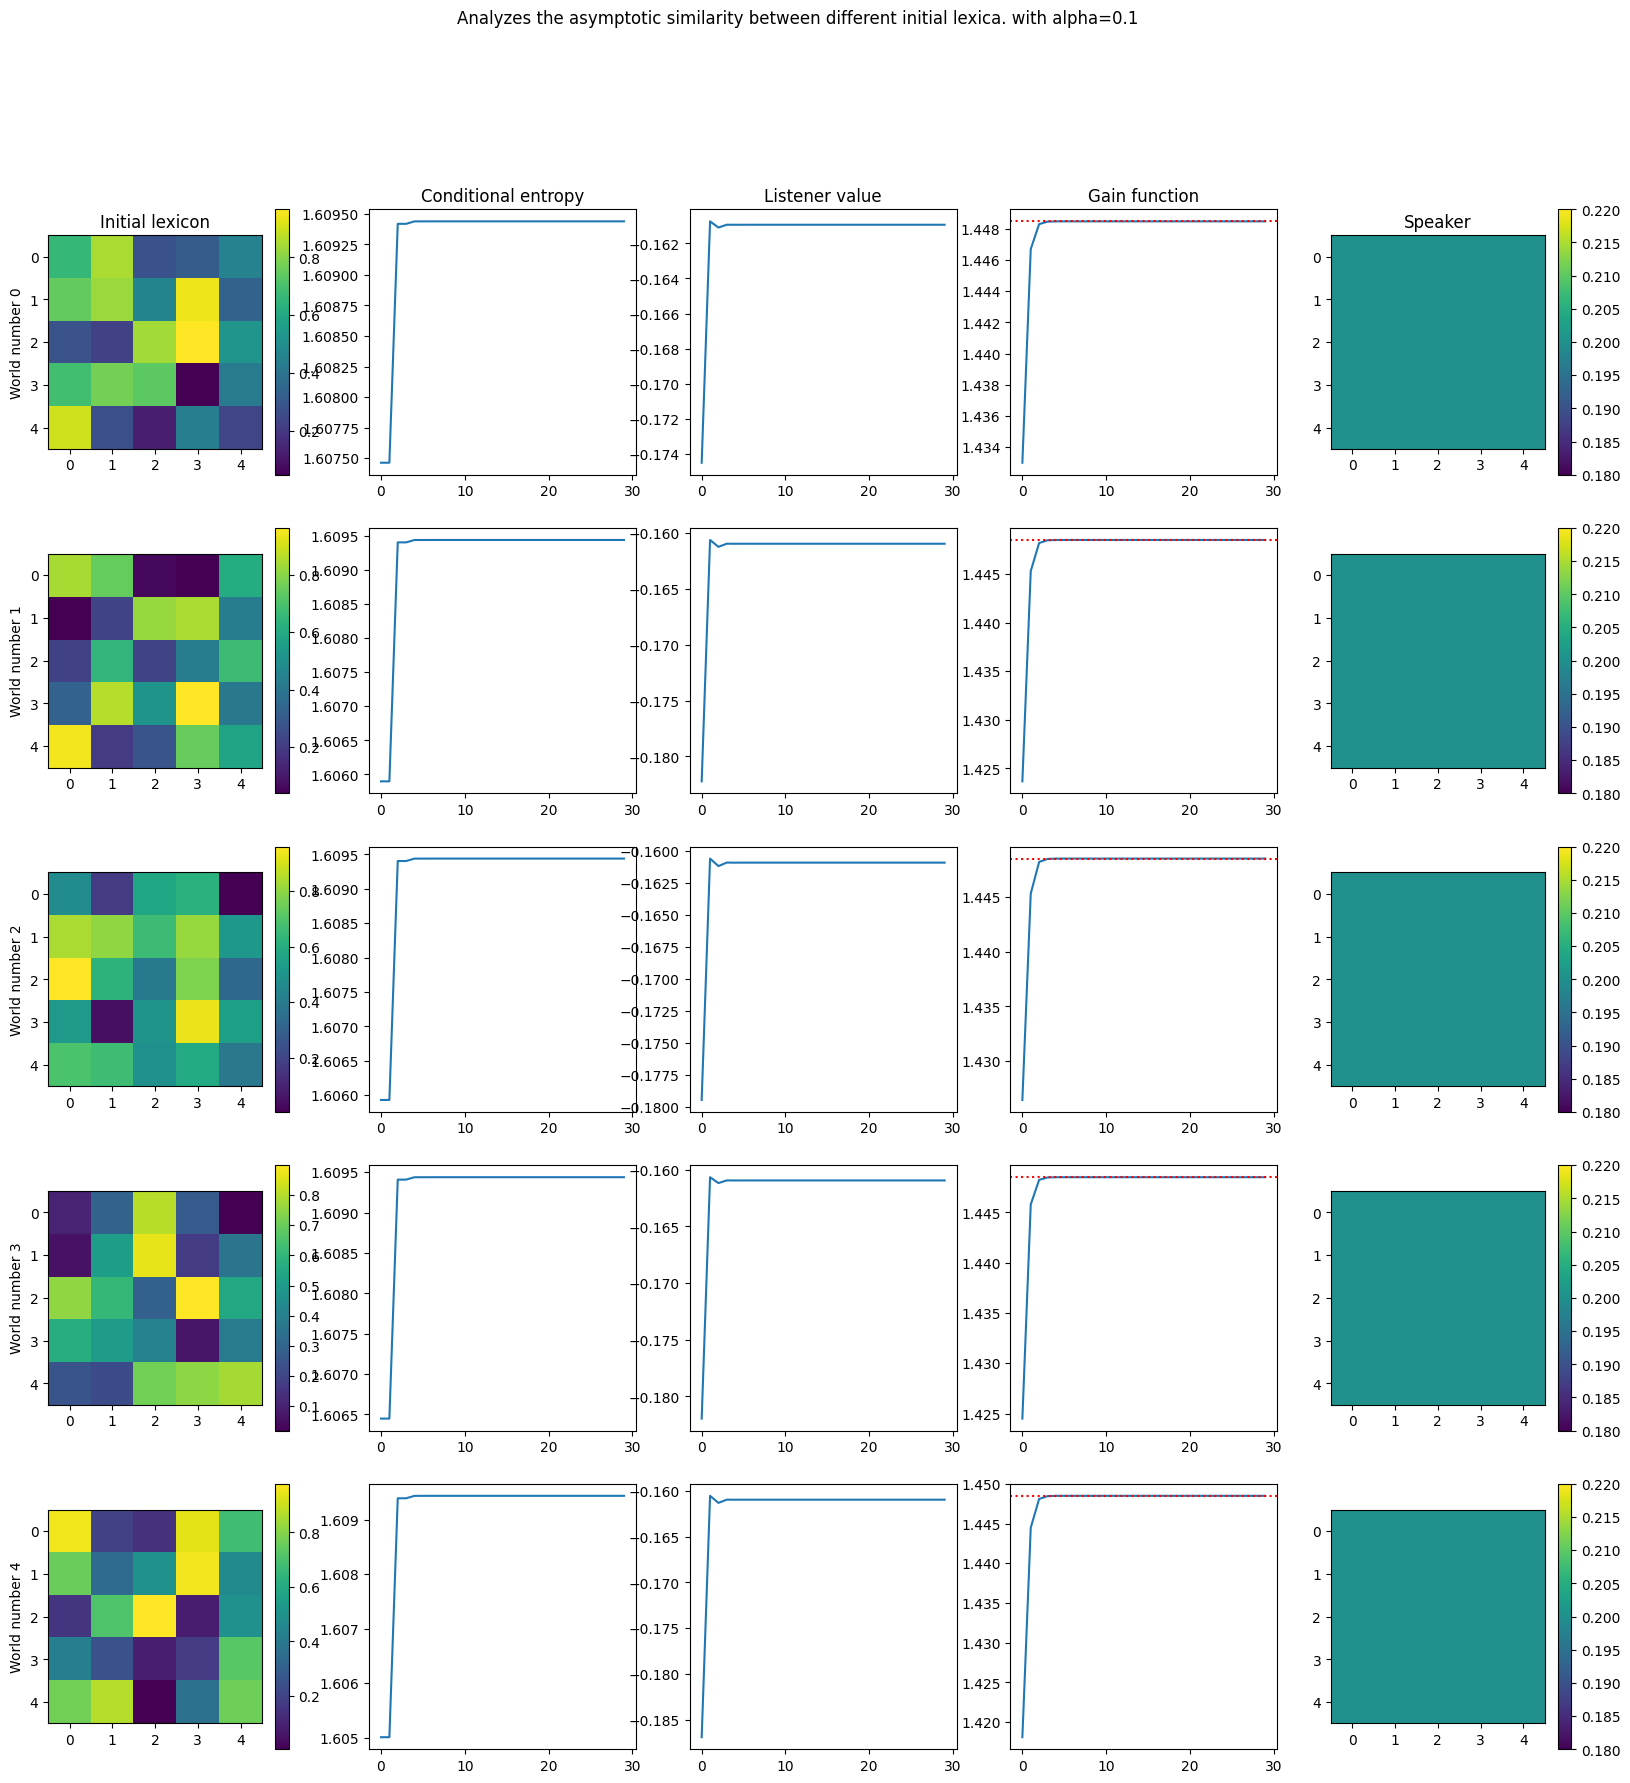

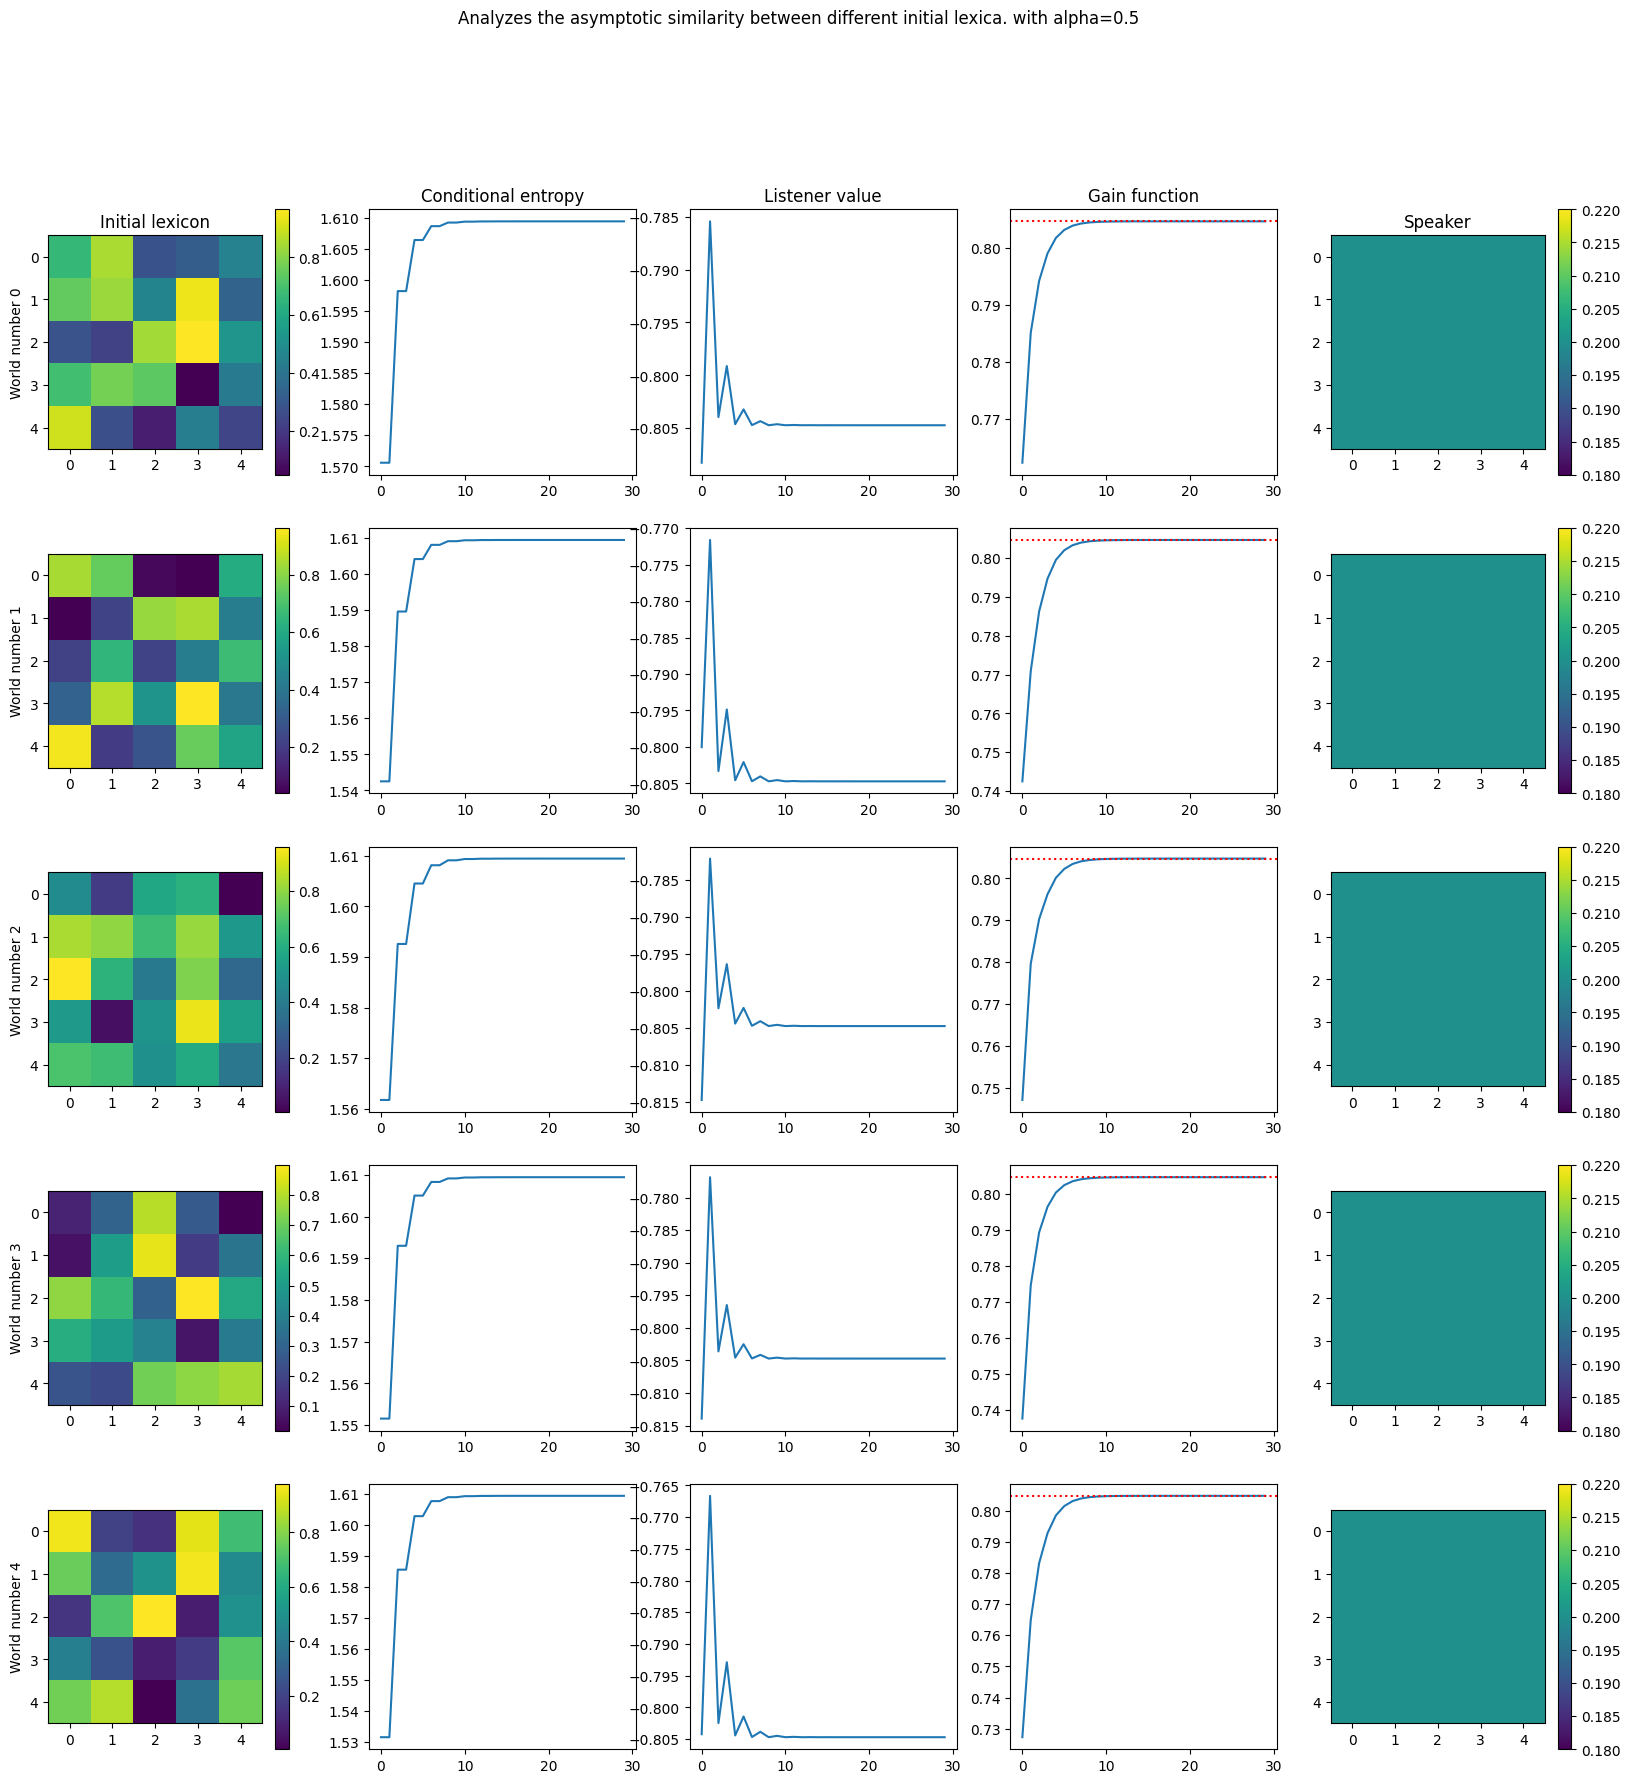

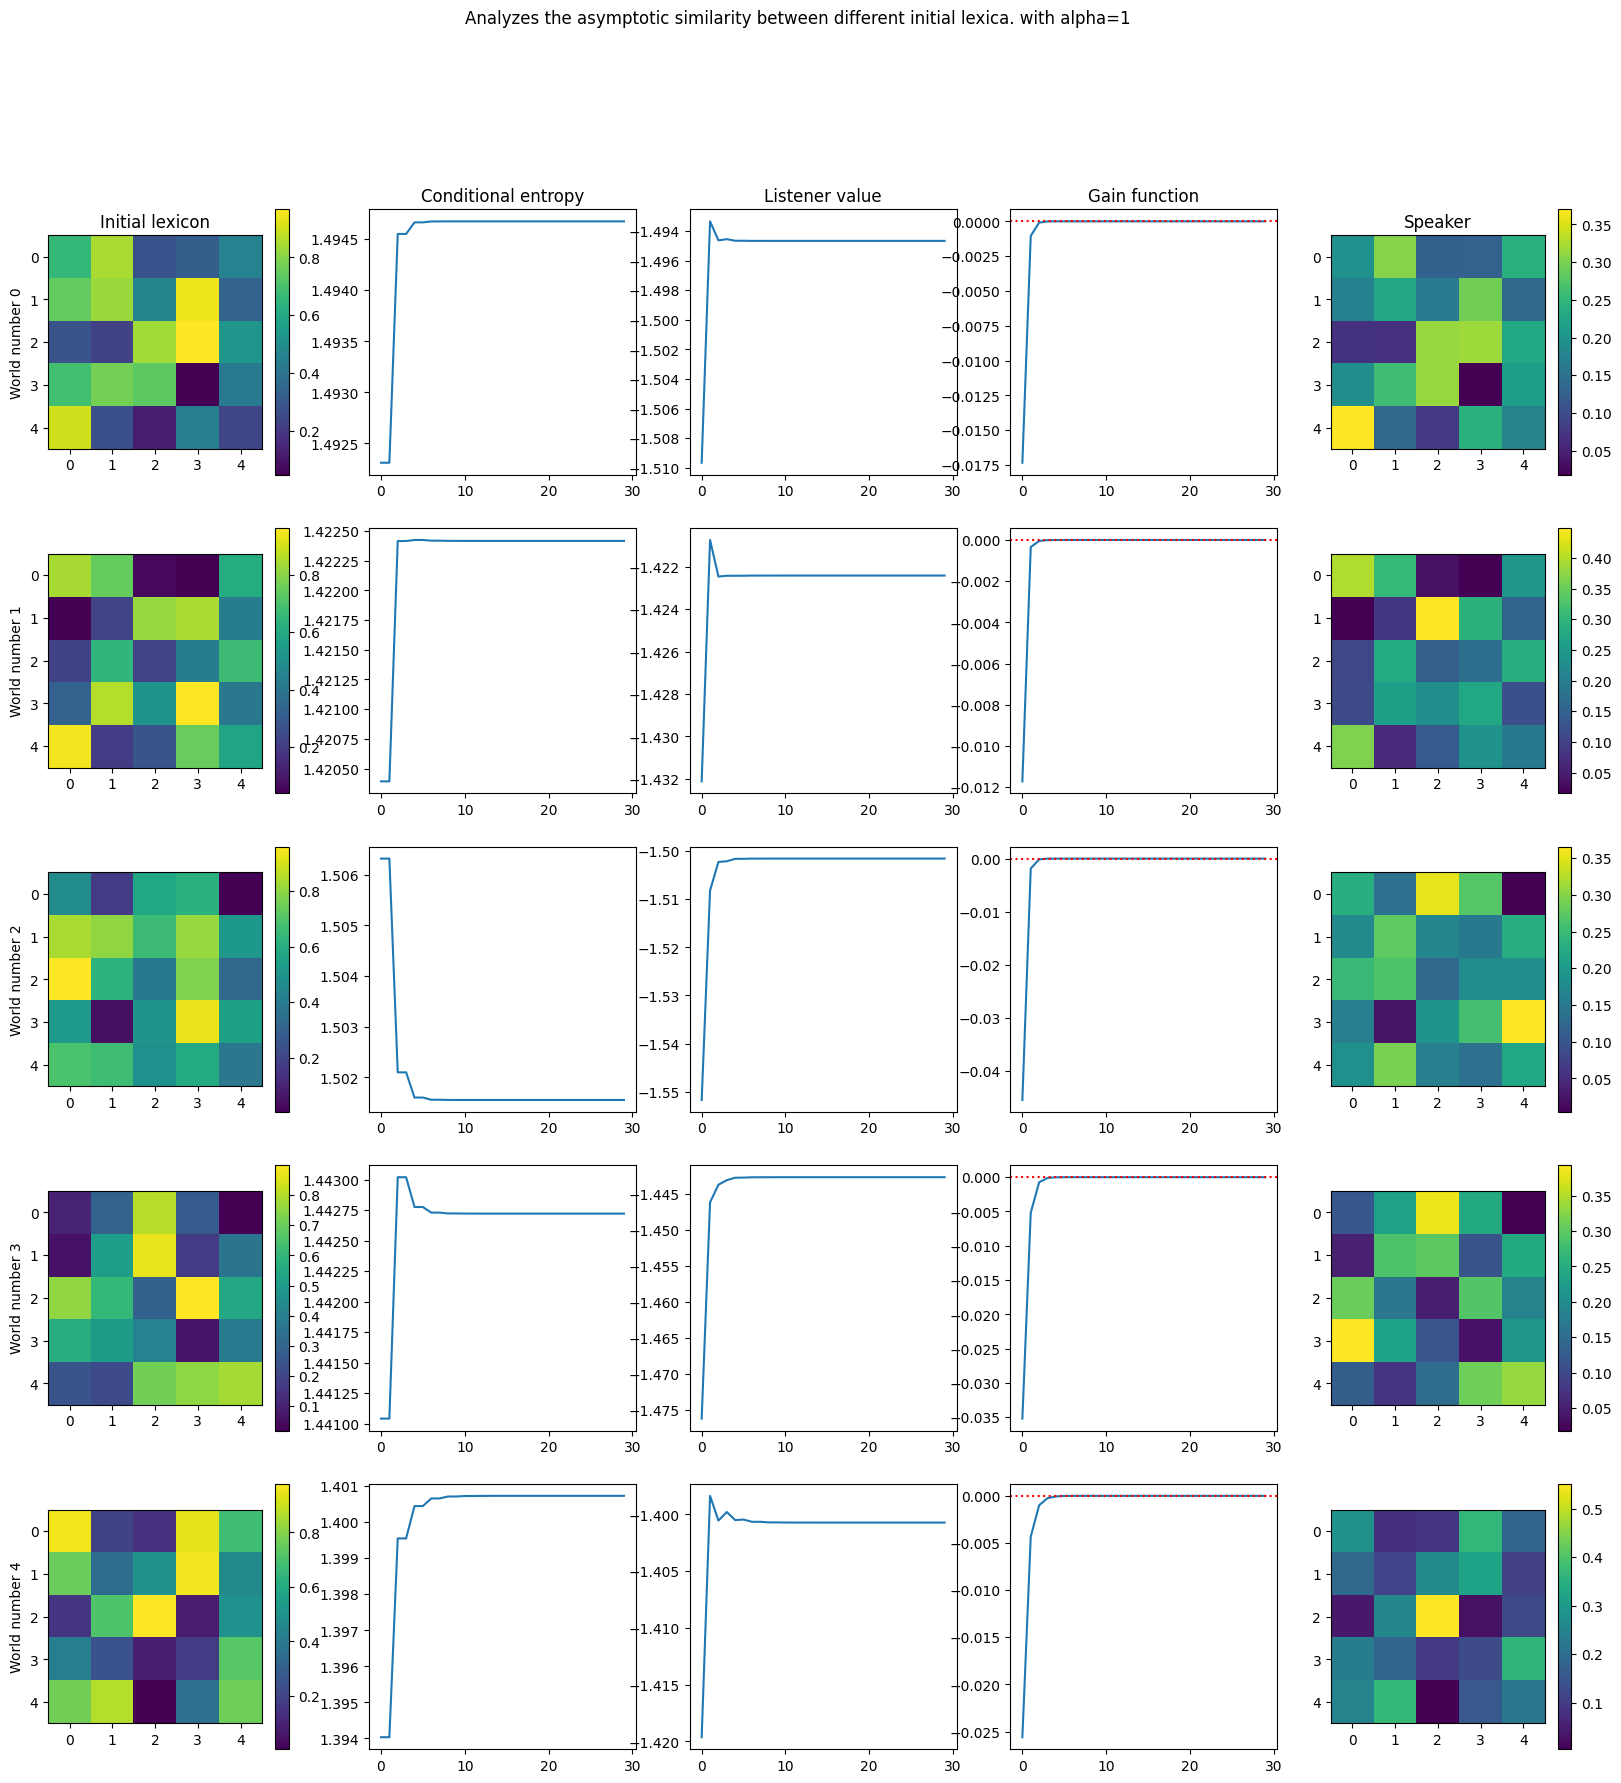

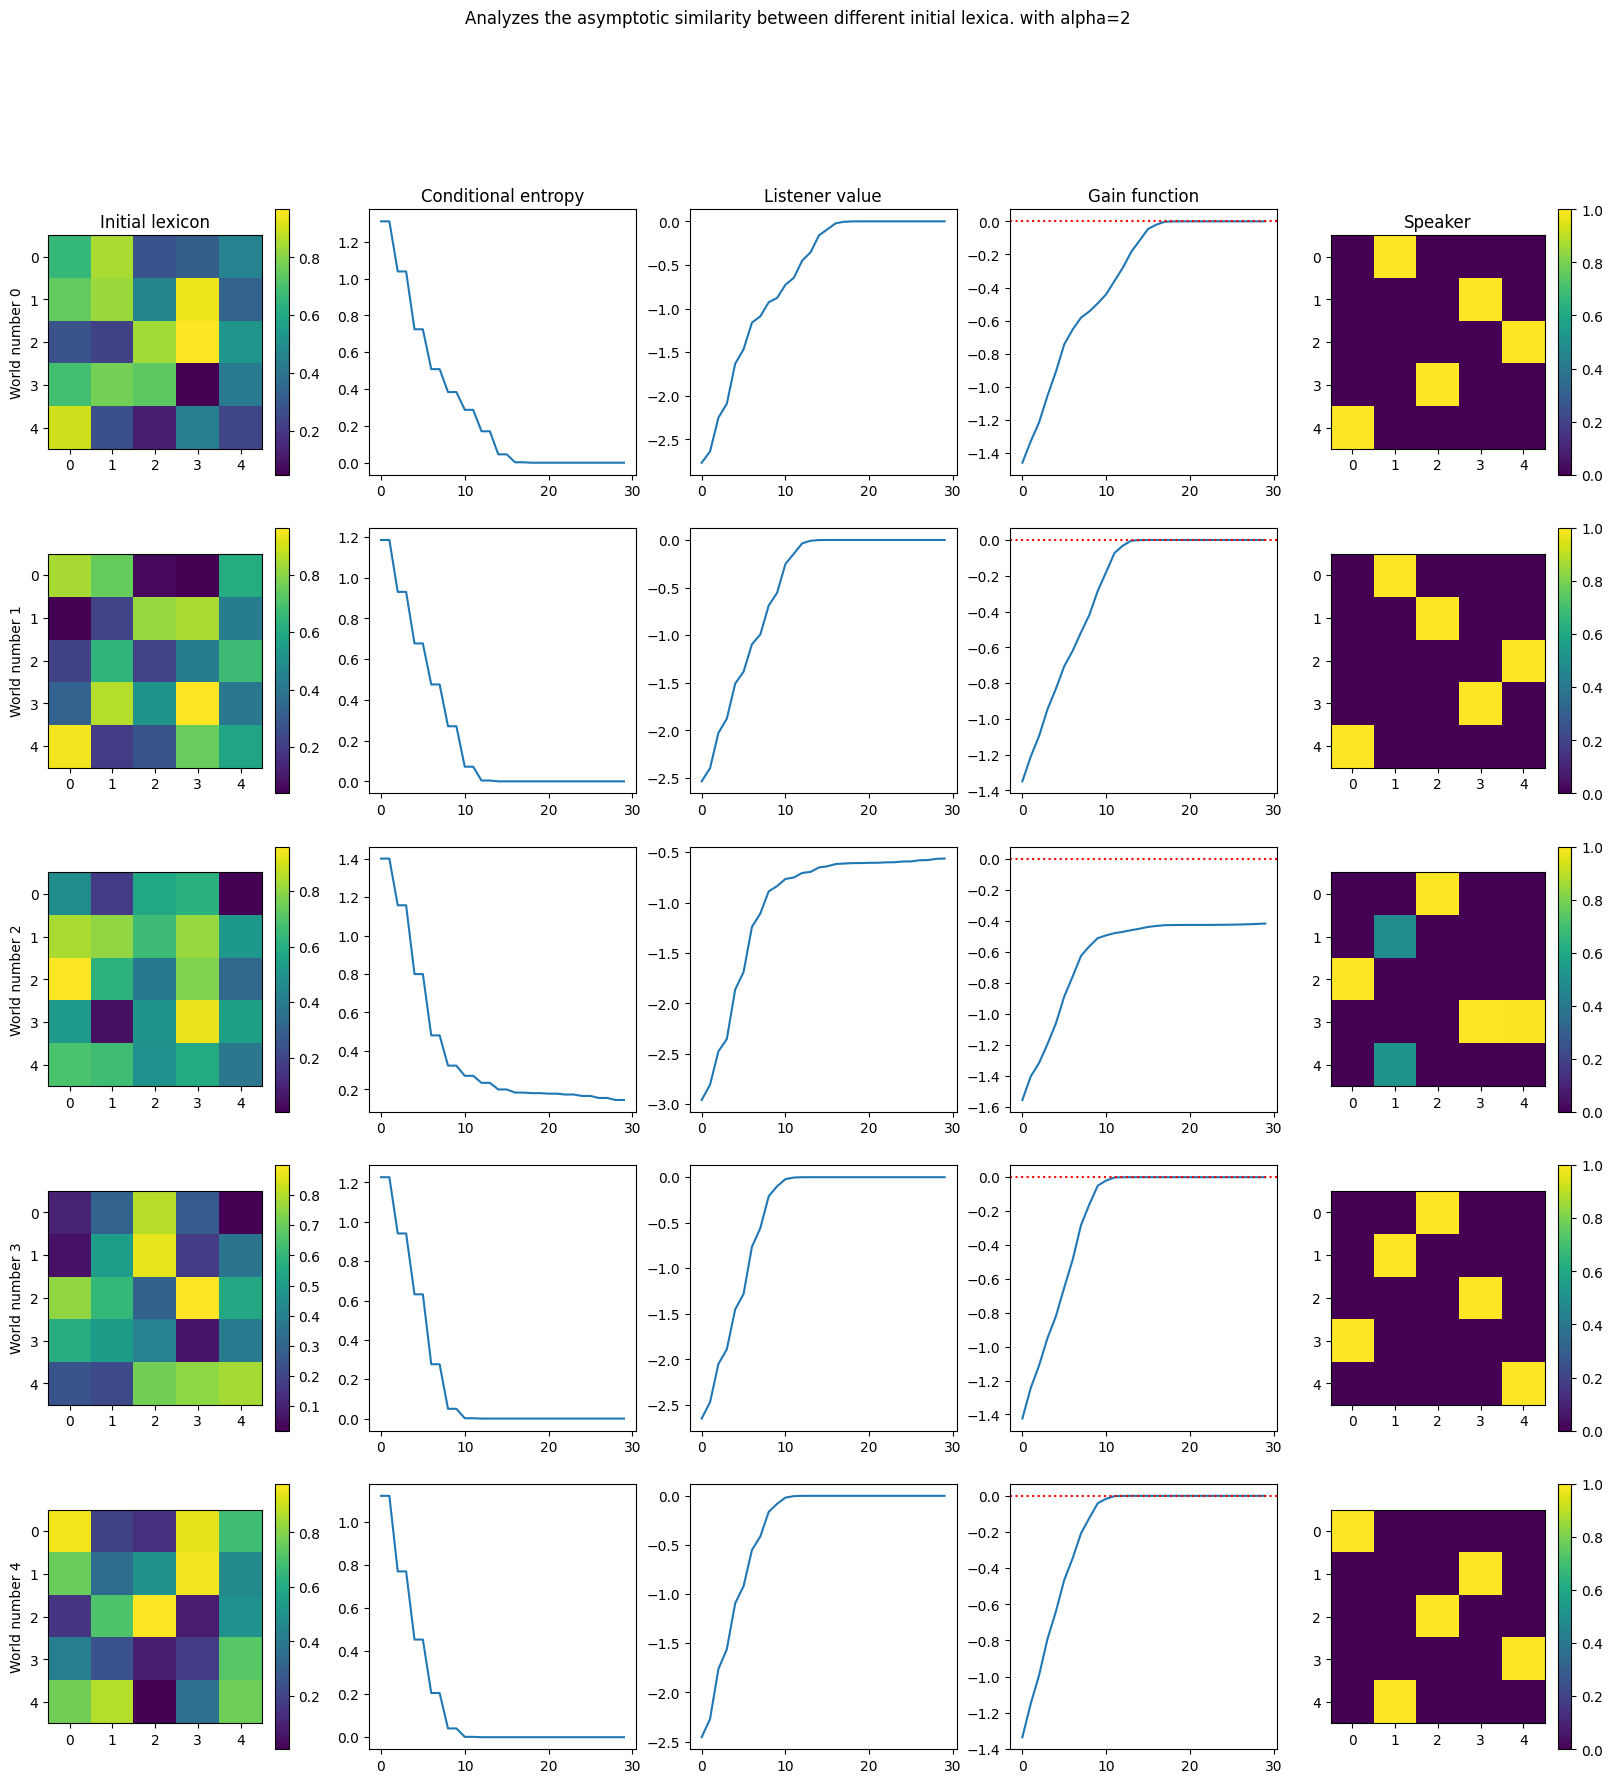

/home/gabriel/RSA_project/my_RSA_framework/basic_RSA/utils.py:13: RuntimeWarning: divide by zero encountered in log
  xlogy = x * np.log(y, where=(x!=0))
/home/gabriel/RSA_project/my_RSA_framework/basic_RSA/utils.py:13: RuntimeWarning: invalid value encountered in multiply
  xlogy = x * np.log(y, where=(x!=0))


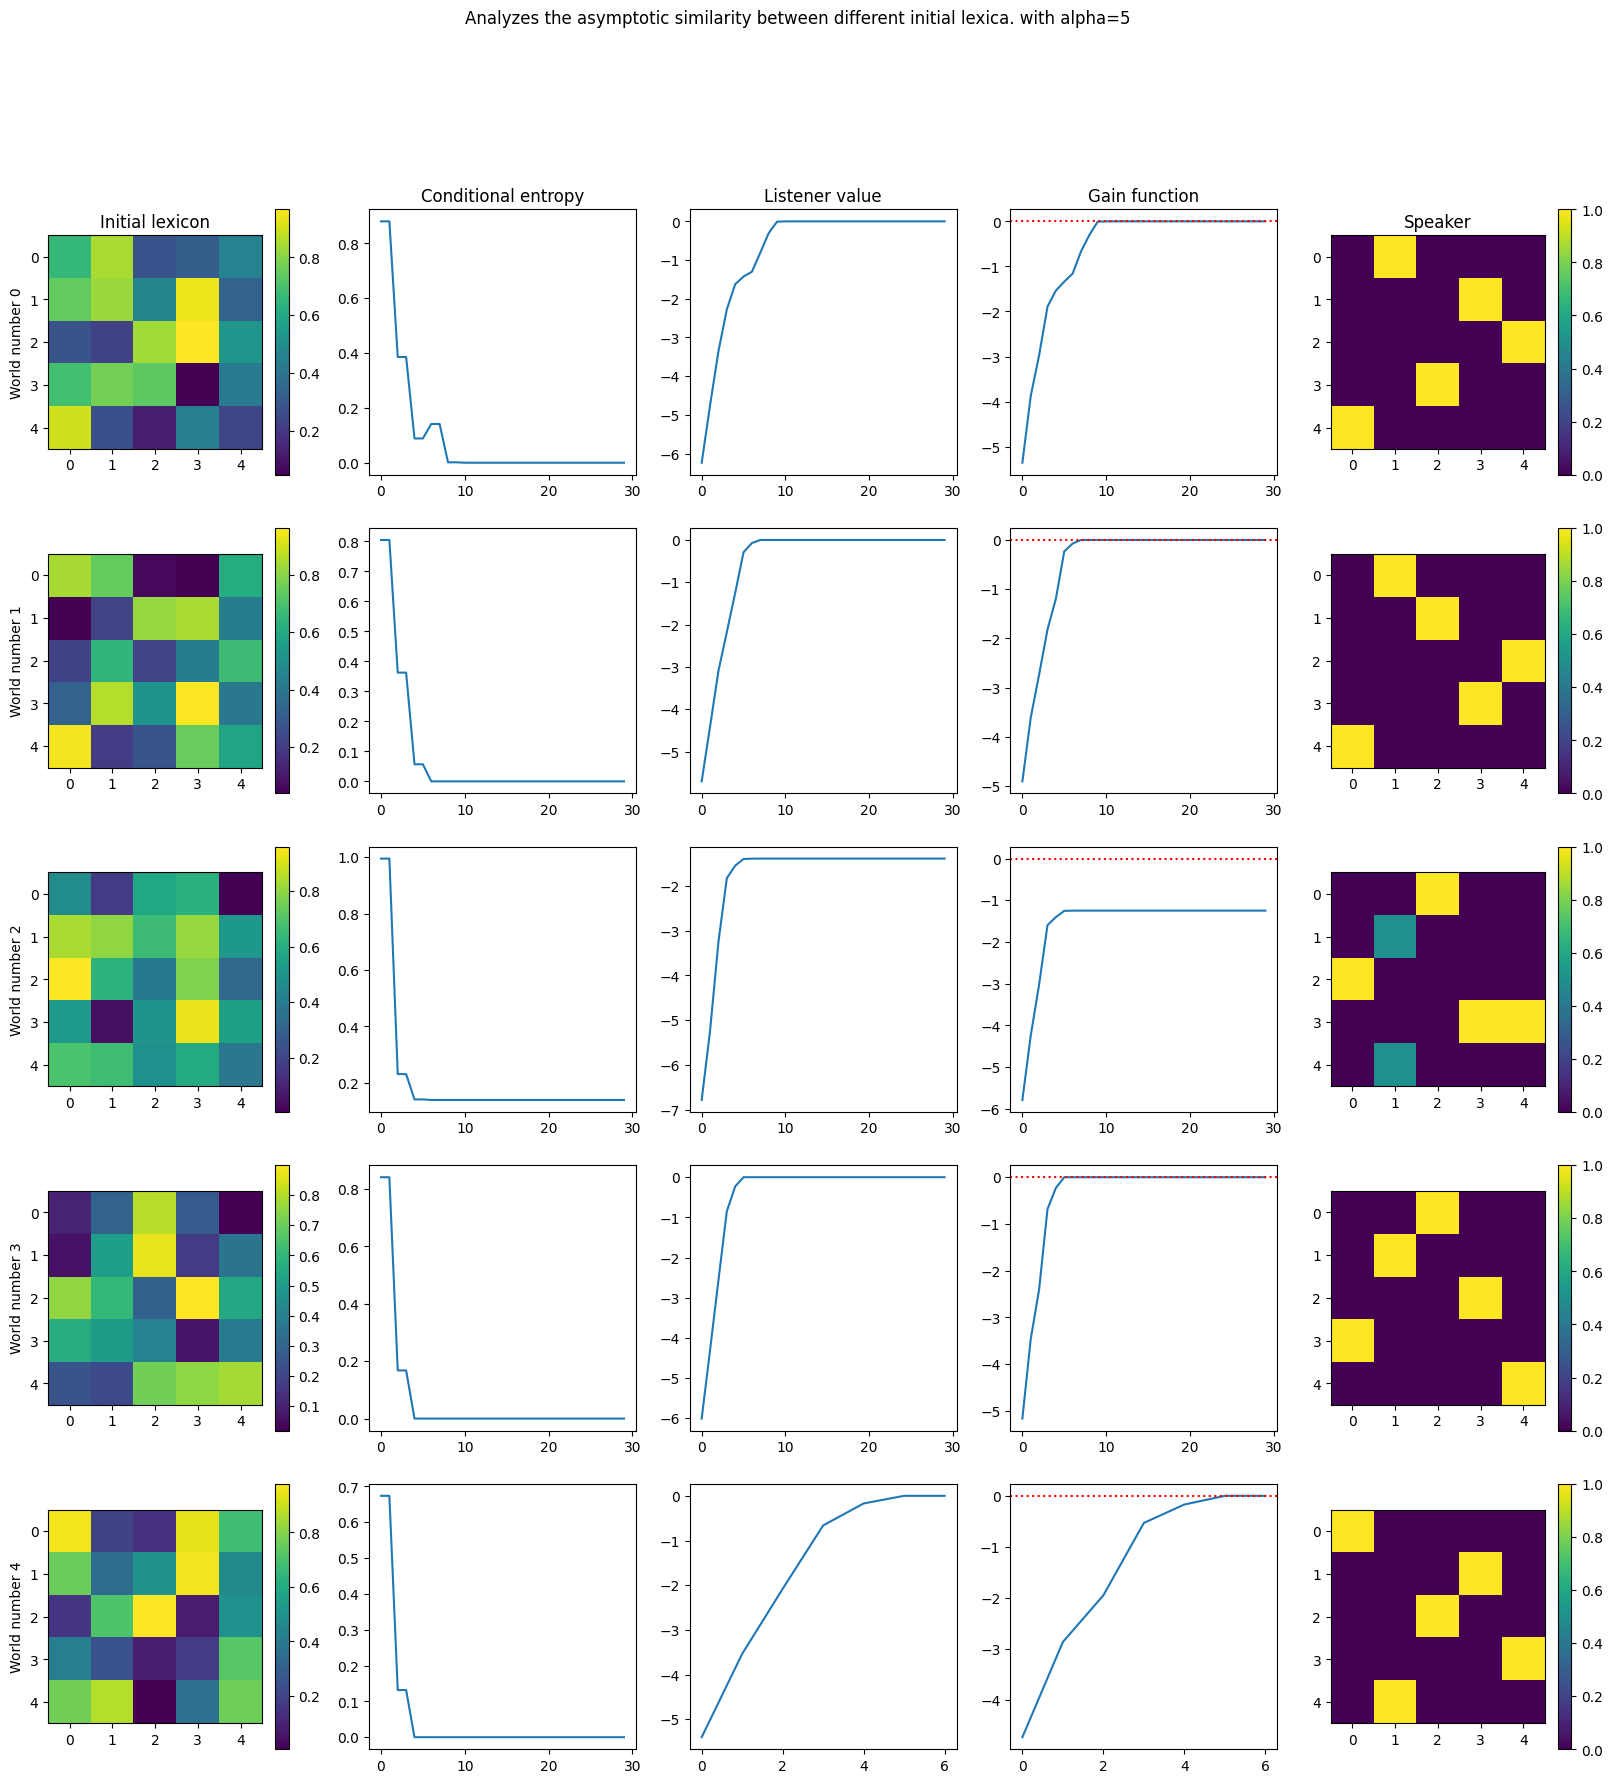

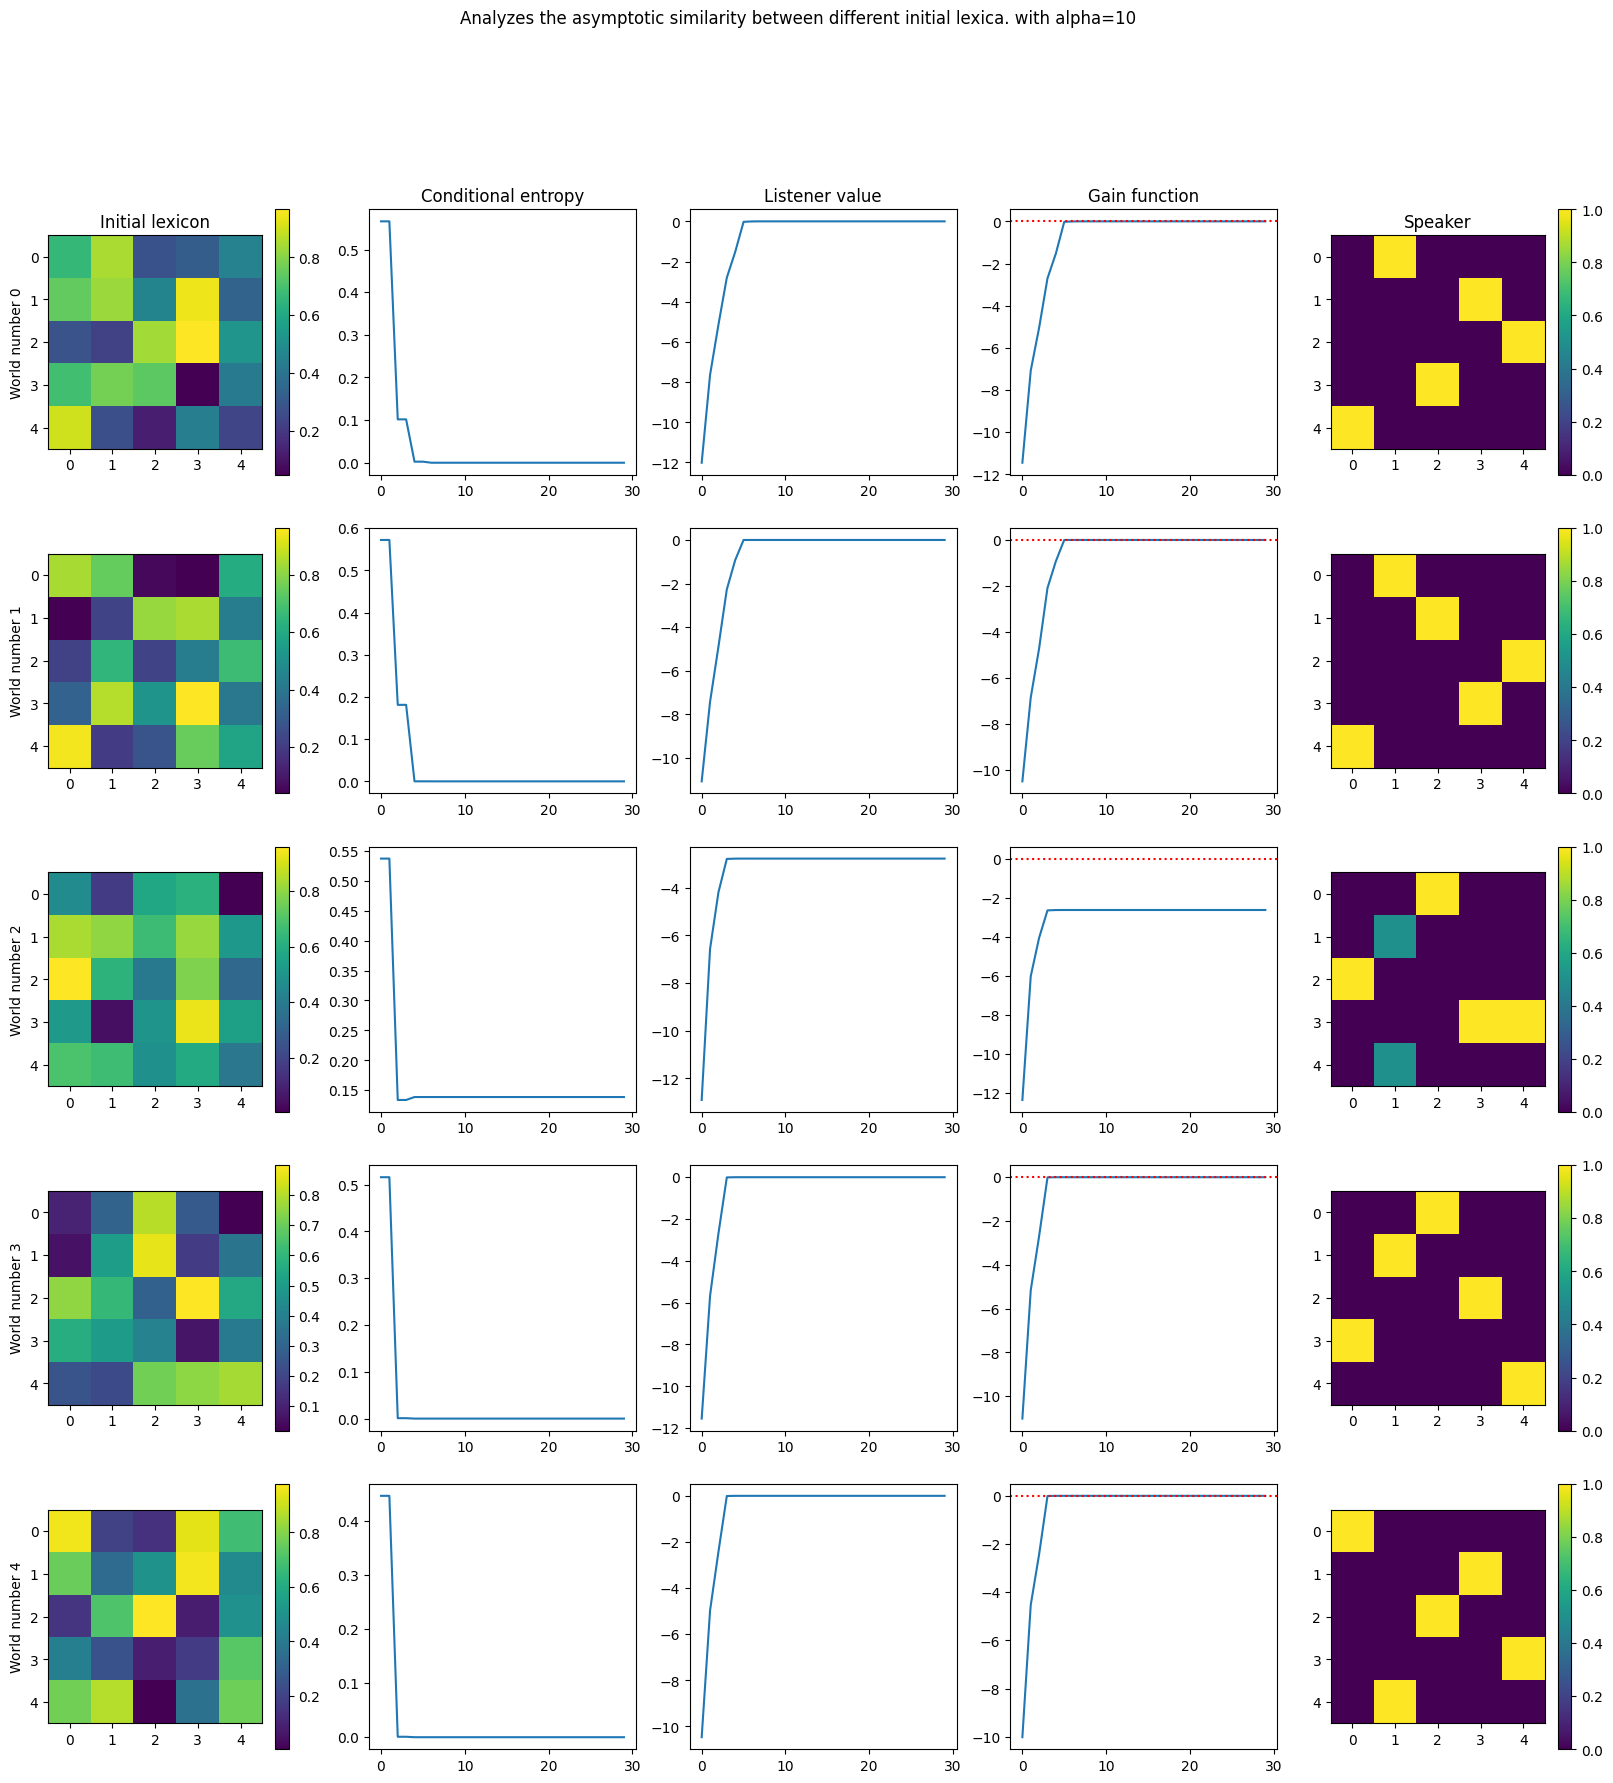

In [4]:
from analyses import asymptotic_analysis_lexica
from settings import worlds, rsa_models
import numpy as np

alphas_list = [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1, 2, 5, 10]
worlds = [
        {
            'file_name': 'Asymptotic_identicality.txt',
            'surname': 'Analyzes the asymptotic similarity between different initial lexica.',
            'utterances': ['I love you', 'I like you', 'You make me indifferent', 'I dislike you', 'I hate you'],
            'meanings': ['Lover', 'Friend', 'Somebody', 'Unfriend', 'Hater'],
            'lexicon': np.random.rand(5, 5),
            'costs': np.array([0, 0, 0, 0, 0]),
            'priors': np.array([1/5,1/5,1/5,1/5,1/5])
        }
        for _ in range(5)
    ]
rsa_model = rsa_models['classic_RSA']
version = 'RSA'
depth = 15
verbose = False

for alpha in alphas_list:
    asymptotic_analysis_lexica(alpha, rsa_model, worlds, version, depth, verbose)